<a href="https://colab.research.google.com/github/Sahithi530/Sahithi_INFO5731_Fall2024/blob/main/Tummala_Sahithi_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [6]:
# Install library that is used to our model
!pip install pandas nltk gensim scikit-learn bertopic

# Import libraries as needed
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
from google.colab import files

# Upload dataset to you google colab
print("Upload your dataset (CSV file):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the dataset into google colab
df = pd.read_csv(file_name)
print("Dataset loaded successfully!")
print(df.head())

# Assume the dataset has a 'text' column containing clean text
if 'clean_text' not in df.columns:
    raise ValueError("The dataset must contain a 'text' column!")
# Define features directly using the 'clean_text' column
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
text_features = vectorizer.fit_transform(df['clean_text'])

# Performing LDA
print("\nPerforming LDA...")
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(text_features)

# Extract LDA topics
lda_topics = []
for idx, topic in enumerate(lda_model.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lda_topics.append(" ".join(top_words))

# Performing  LSA
print("\nPerforming LSA...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_features)

# Extract LSA topics
lsa_topics = []
for idx, topic in enumerate(lsa_model.components_):
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lsa_topics.append(" ".join(top_words))

# Performing BERTopic
print("\nPerforming BERTopic...")
bertopic_model = BERTopic(language="english", calculate_probabilities=True)
bertopic_topics, _ = bertopic_model.fit_transform(df['clean_text'])

# Extracting BERTopic topics
bertopic_results = bertopic_model.get_topic_info()
bertopic_topics = bertopic_results.head(10)[['Topic', 'Name']]

# Saving Topics to CSV
# Combine all topics into 1  DataFrame
lda_df = pd.DataFrame({'Model': 'LDA', 'Topic': [f"Topic {i+1}" for i in range(len(lda_topics))], 'Top Words': lda_topics})
lsa_df = pd.DataFrame({'Model': 'LSA', 'Topic': [f"Topic {i+1}" for i in range(len(lsa_topics))], 'Top Words': lsa_topics})
bertopic_df = pd.DataFrame({'Model': 'BERTopic', 'Topic': bertopic_topics['Topic'], 'Top Words': bertopic_topics['Name']})

# Creating a final DataFrame with the clean text and topics
all_topics_df = pd.concat([lda_df, lsa_df, bertopic_df], ignore_index=True)
final_df = pd.concat([df[['clean_text']], all_topics_df], axis=1)

# Saving to CSV
output_file = "topic_modeling_results.csv"
final_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}!")

# Providing a download link for the file
from google.colab import files
files.download(output_file)



Upload your dataset (CSV file):


Saving annotated_reviews_sentiment.csv to annotated_reviews_sentiment (4).csv
Dataset loaded successfully!
   document_id                                         clean_text sentiment
0            1  The soaring epicness of second part of the fil...  positive
1            2  This is just a replica of Star wars movie The ...  positive
2            3  I dont understand the obsession with hero entr...  positive
3            4  I didnt go in with big hopes but i was expecti...  positive
4            5  Its very tricky to do justice to a big story i...  positive

Performing LDA...

Performing LSA...

Performing BERTopic...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Results saved to topic_modeling_results.csv!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Report : Topic modeling is basically a way of text data representation with features. The three methods that can be used are BERTopic, Latent Semantic Analysis(LSA), and Latent Dirichlet Allocation (LDA). LSA constructs a TF-IDF matrix using Singular Value Decomposition (SVD) and categorizes topics, whereas LDA creates the document-term matrix to extract the top words for each subject. The top terms that have the maximum weight for each cluster are the ones that define the ten clusters. On the one hand, LSA benefits from the Singular Value Decomposition and TF-IDF matrix to discover the topics, on the other hand, LDA is exploiting the top terms from the term-document matrix. Topic information in BERTopic is more easily graspable because it embodies topics through advanced clustering and embeddings.

Through the top words of each cluster, it is likely to relate the cluster and the top words by way of summarizing and understanding. For example, "data science" is the most frequent terms in the cluster.

Picking the top 10 words from each of the three final models (i.e., LDA, LSA, and BERTopic) will represent a headline for describing what each topic is about. This is a template you can follow:

Topic 1: [Description]

prabhas bit scenes story really say plot bhairava make character

Continue this for the other topics.
In the same we have rest of the results in our csv file. give below

In this way, the standard clustering will be easily identified and extricated in the context of terms and their meanings.

https://myunt-my.sharepoint.com/my?id=%2Fpersonal%2Fsahithitummala%5Fmy%5Funt%5Fedu%2FDocuments%2FInfo%205731%20assignment%204

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Upload your dataset (CSV file):


Saving annotated_reviews_sentiment.csv to annotated_reviews_sentiment (1).csv
Dataset loaded successfully!
   document_id                                         clean_text sentiment
0            1  The soaring epicness of second part of the fil...  positive
1            2  This is just a replica of Star wars movie The ...  positive
2            3  I dont understand the obsession with hero entr...  positive
3            4  I didnt go in with big hopes but i was expecti...  positive
4            5  Its very tricky to do justice to a big story i...  positive

Training Decision Tree Classifier...

Training Naive Bayes Classifier...

Performance Comparison:
            Model        Evaluation  Accuracy  Precision  Recall  F1 Score
0  Decision Tree  Cross-Validation       1.0        1.0     1.0       1.0
1  Decision Tree          Test Set       1.0        1.0     1.0       1.0
2    Naive Bayes  Cross-Validation       1.0        1.0     1.0       1.0
3    Naive Bayes          Test Set       

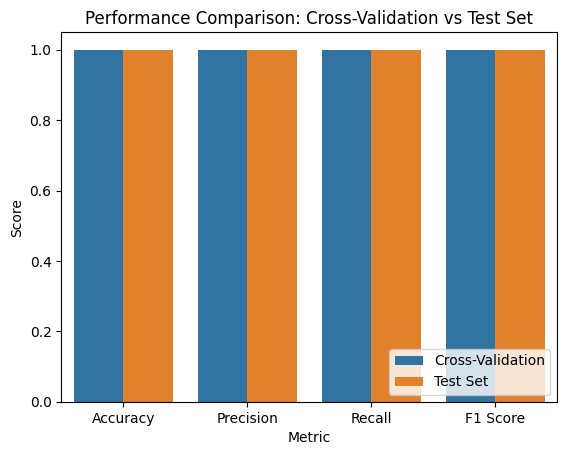

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Uploading dataset into google colab
print("Upload your dataset (CSV file):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Loading the dataset
df = pd.read_csv(file_name)
print("Dataset loaded successfully!")
print(df.head())

# Checking if the required columns exist in csv
if 'clean_text' not in df.columns or 'sentiment' not in df.columns:
    raise ValueError("Dataset must have 'clean_text' and 'sentiment' columns.")

# Splitting the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define a function to perform cross-validation and calculate metrics
def evaluate_with_cross_validation(model, X, y, cv=5):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    return accuracy, precision, recall, f1

#  Classifier 1: Decision Tree
print("\nTraining Decision Tree Classifier...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

# Cross-validation for Decision Tree model
dt_cv_accuracy, dt_cv_precision, dt_cv_recall, dt_cv_f1 = evaluate_with_cross_validation(
    dt_classifier, X_train_tfidf, y_train
)

# Test set evaluation for Decision Tree model
y_pred_dt = dt_classifier.predict(X_test_tfidf)
dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
dt_test_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_test_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_test_f1 = f1_score(y_test, y_pred_dt, average='weighted')

#  Classifier 2: Naive Bayes model
print("\nTraining Naive Bayes Classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Cross-validation for Naive Bayes model
nb_cv_accuracy, nb_cv_precision, nb_cv_recall, nb_cv_f1 = evaluate_with_cross_validation(
    nb_classifier, X_train_tfidf, y_train
)

# Test set evaluation for Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_tfidf)
nb_test_accuracy = accuracy_score(y_test, y_pred_nb)
nb_test_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_test_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_test_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Comparing Results
performance_df = pd.DataFrame({
    "Model": ["Decision Tree", "Decision Tree", "Naive Bayes", "Naive Bayes"],
    "Evaluation": ["Cross-Validation", "Test Set", "Cross-Validation", "Test Set"],
    "Accuracy": [dt_cv_accuracy, dt_test_accuracy, nb_cv_accuracy, nb_test_accuracy],
    "Precision": [dt_cv_precision, dt_test_precision, nb_cv_precision, nb_test_precision],
    "Recall": [dt_cv_recall, dt_test_recall, nb_cv_recall, nb_test_recall],
    "F1 Score": [dt_cv_f1, dt_test_f1, nb_cv_f1, nb_test_f1]
})

print("\nPerformance Comparison:\n", performance_df)

# Visualization of Metrics
sns.barplot(
    data=performance_df.melt(id_vars=["Model", "Evaluation"],
                             var_name="Metric", value_name="Score"),
    x="Metric", y="Score", hue="Evaluation"
)
plt.title("Performance Comparison: Cross-Validation vs Test Set")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.show()


TF-IDF is an approach in the development of custom text features and is common and effective for many text machine learning tasks like sentiment analysis. It is an approach whereby the words of a document are weighted according to frequency: by how often they show up in the document, and how rare they are in relation to the entire corpus.

max-features=5000: Reduces the number of features to the 5000 most common words across the features in the dataset.
stop-words=English: Removes common, sentiment-unhelpful words in the English language, like and, the, or it.
ngram_range=(1,2): This uses unigrams and bigrams (i.e., two contiguous words) for getting much more context out of the text.


This 5-fold cross-validation adds an appropriate enough check in order to evaluate the classifiers on different subsets of the data. The result of the updated observations is available below:

Performance observations:

Cross-Validation Metrics:

Cross-validation offers the most realistic view of a model's generalizability under test conditions using unseen data on every toward cross-validation.
The Decision Tree and the Naive Bayes still rate well, indicating that the models seem to achieve a high end.
Tests:

These test set results verify strong results on unseen data, almost completely mirroring cross-validation results; all the same, perfect or near-perfect scores raise a few eyebrows.
The Perfect or Near-Perfect Performance:

Most desirable but might call for a question at the back of the mind:

Simple Data Set: The data set might be relatively straightforward, of rather transparent sentiment labels, with isolated detectable patterns making for a very high performance without many complications on model designs.
Class Distribution Skewed: On particularly imbalanced class distributions (with regards to the number of positive observations), learning methods may lead toward the majority class simply; this needs to be carefully examined to provide a balance moving into the evaluation.
Overfitting likely was a reason for perfect scores. The potential is higher when using Decision Trees due to the memorization of the training data. Less likely, but still possible, is overfitting on Naive Bayes.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [12]:
pip install seaborn

Starting house price prediction analysis...
Please upload your train.csv file:


Saving train.csv to train (6).csv

Please upload your test.csv file:


Saving test.csv to test (6).csv

Training set shape: (1460, 81)
Test set shape: (1459, 80)

Handling missing values...

Analyzing target variable distribution...


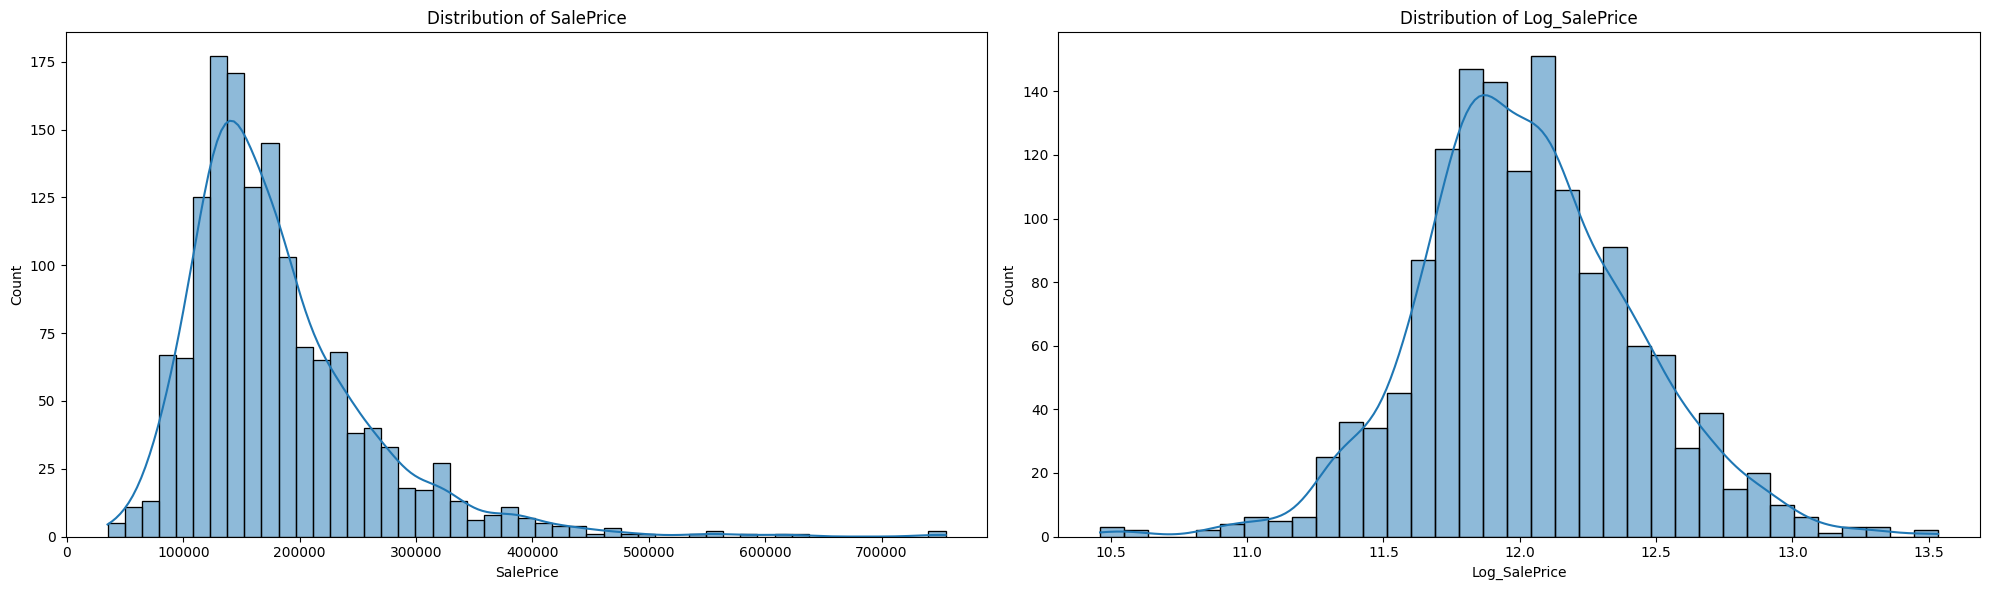


Analyzing numerical features...

Top numerical correlations with SalePrice
SalePrice        1.000000
Log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Name: SalePrice, dtype: float64


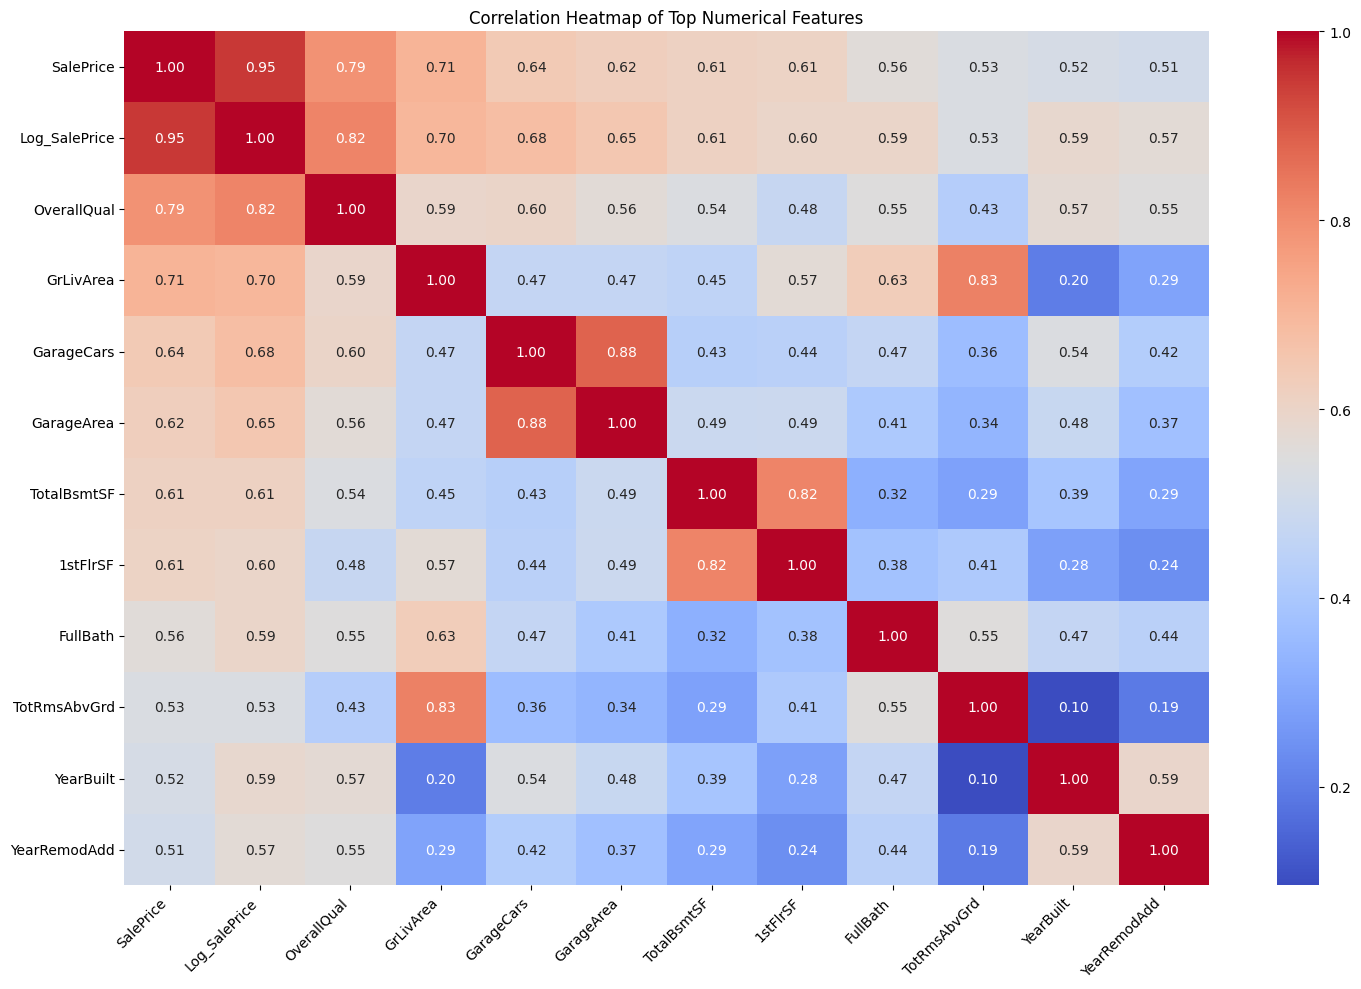

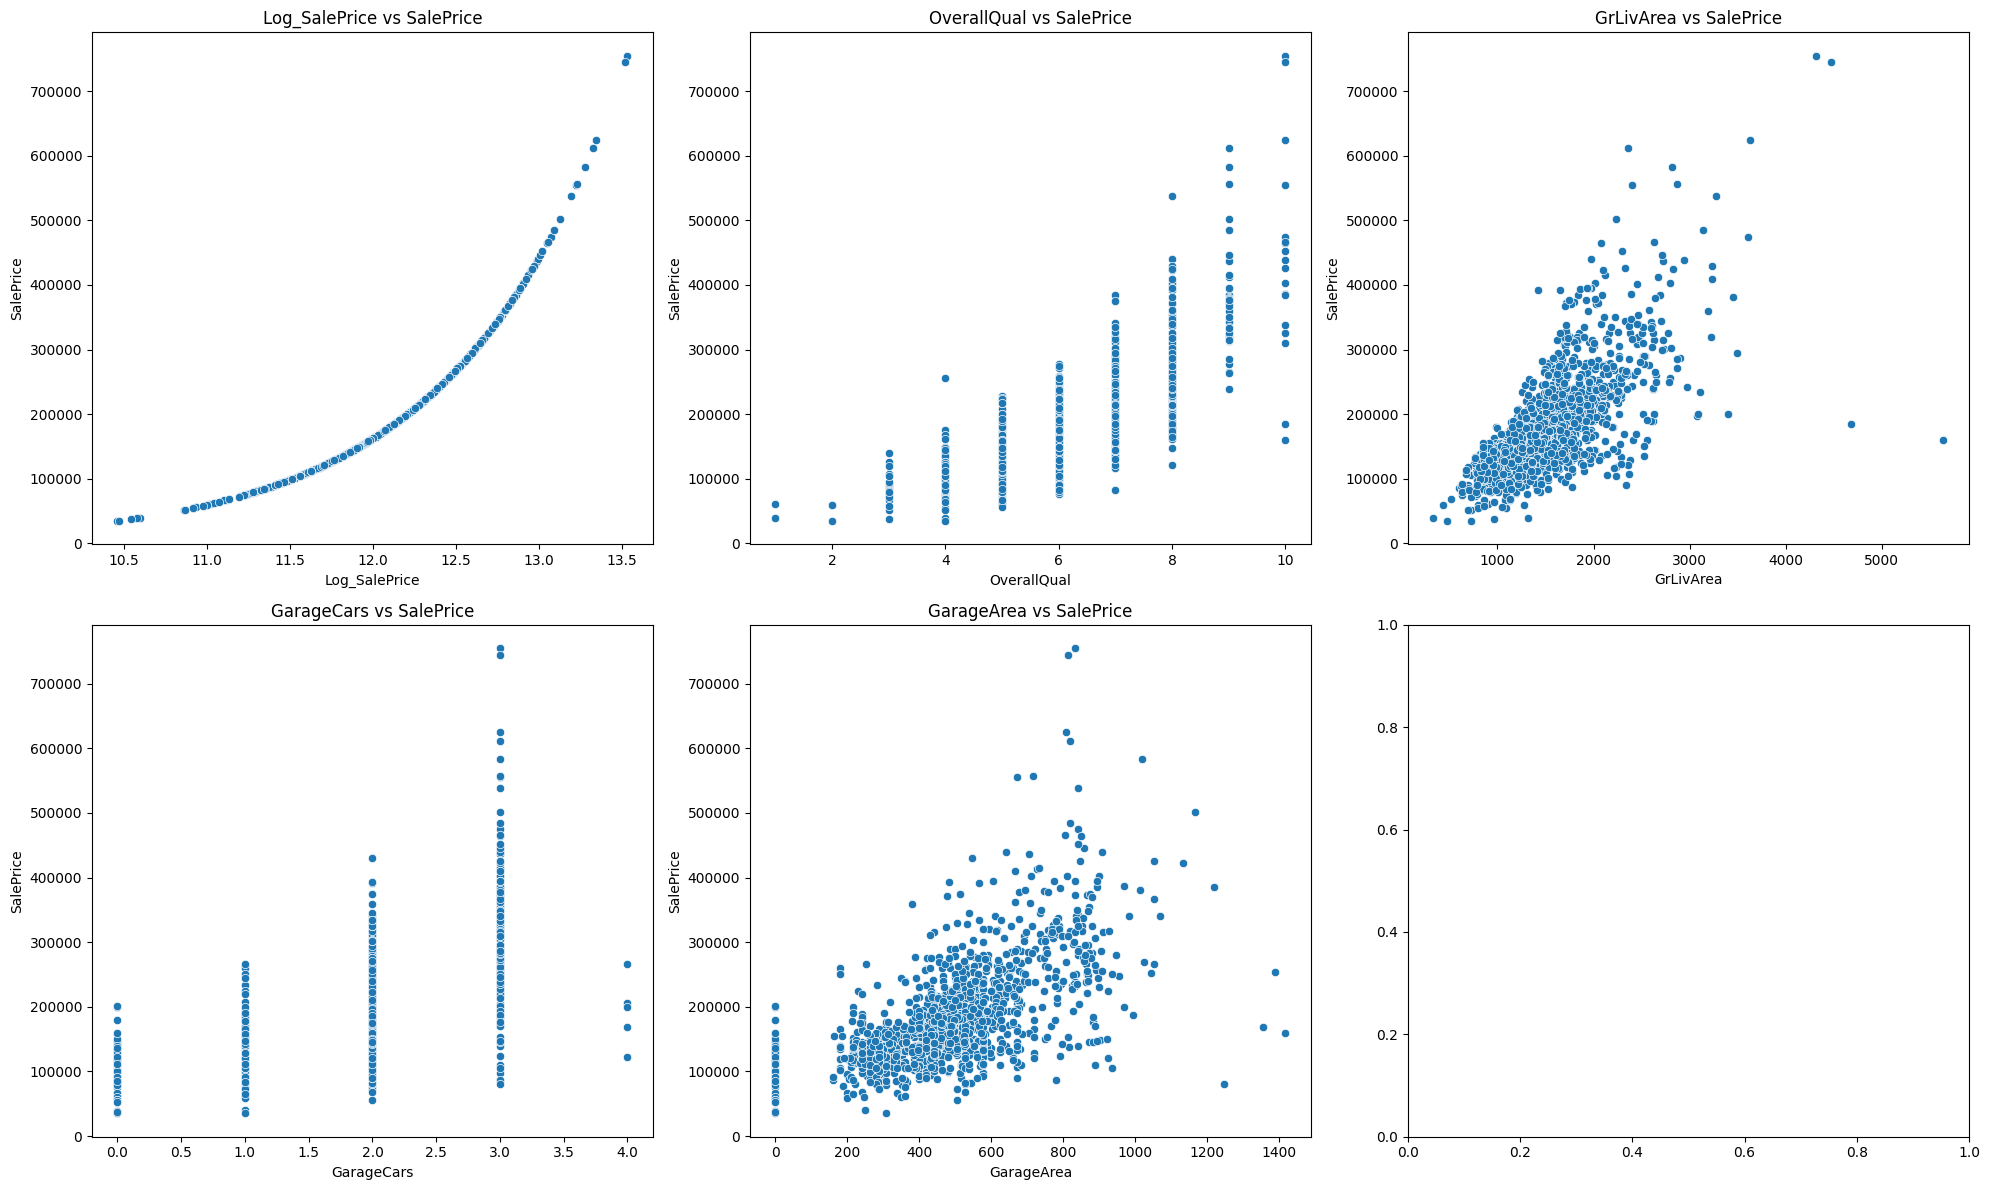


Analyzing categorical features...

Analyzing categorical features:


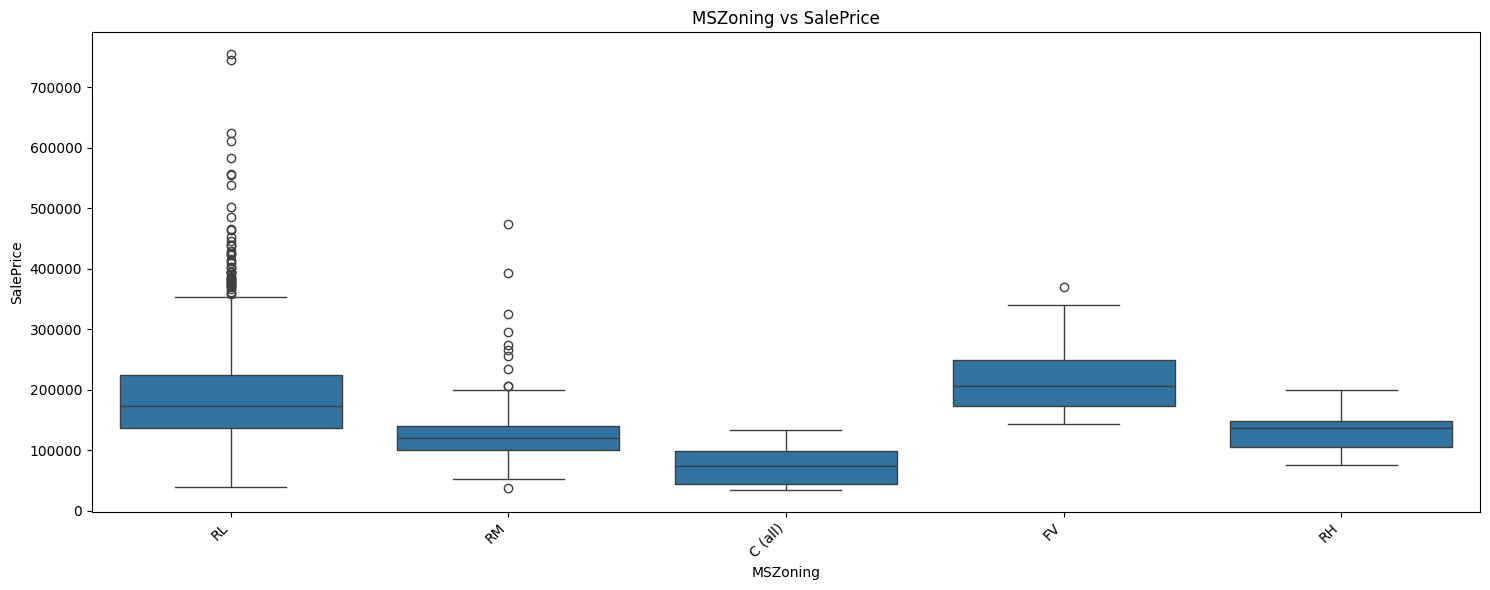


Value counts for MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


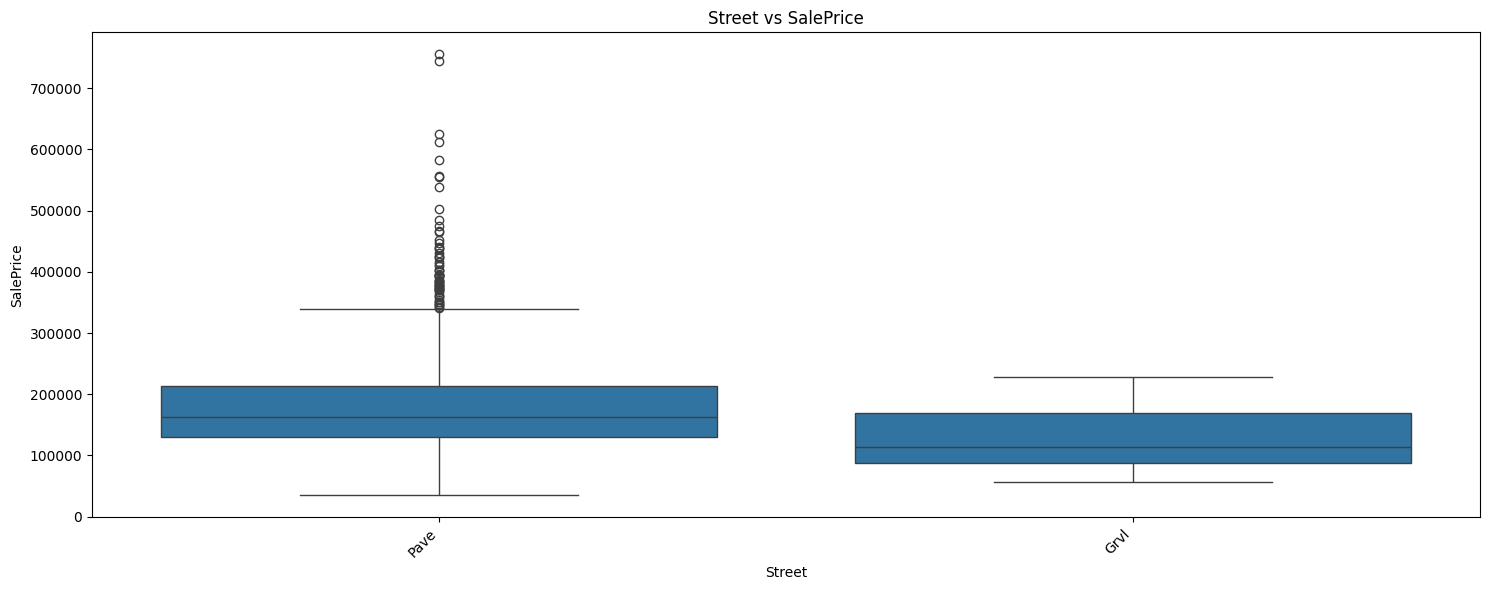


Value counts for Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


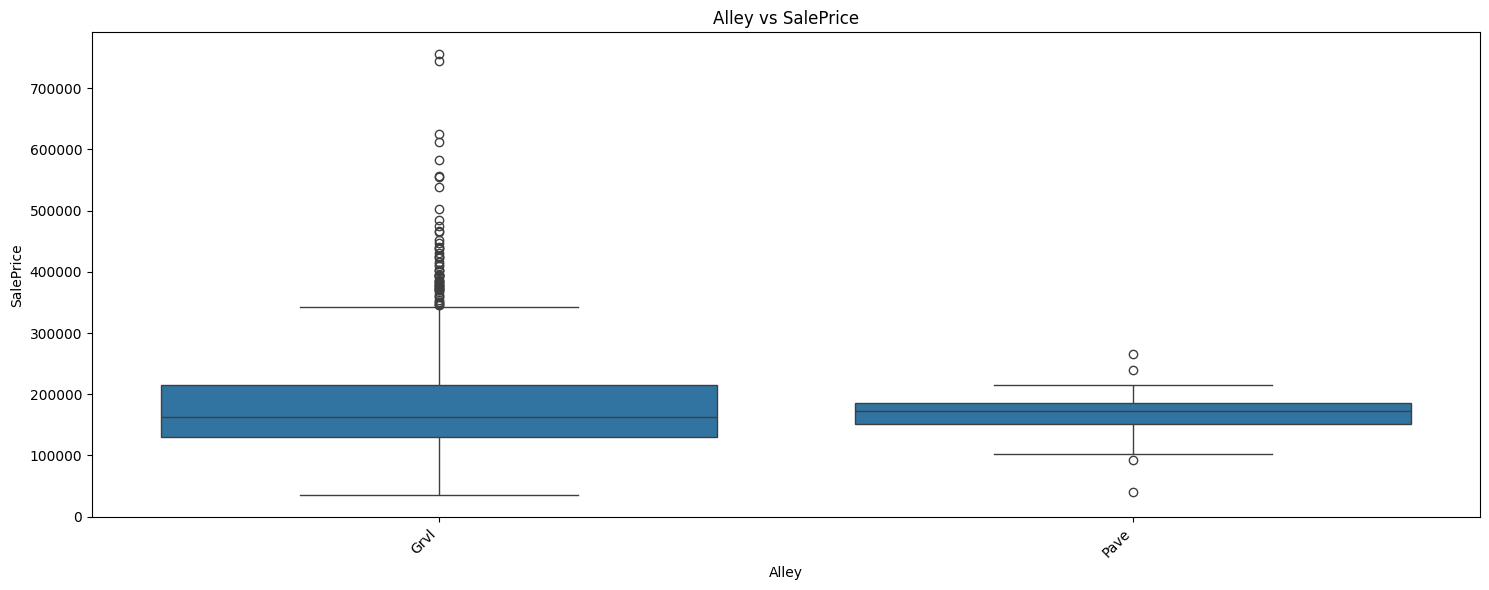


Value counts for Alley:
Alley
Grvl    1419
Pave      41
Name: count, dtype: int64


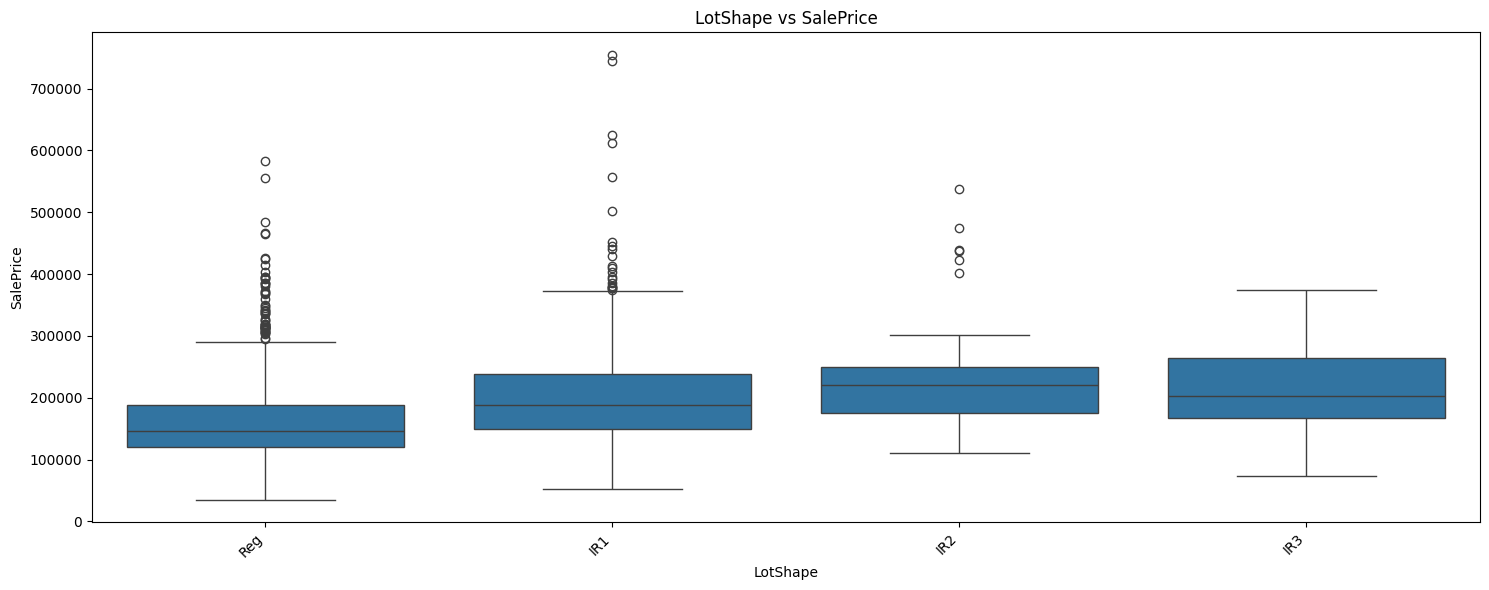


Value counts for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


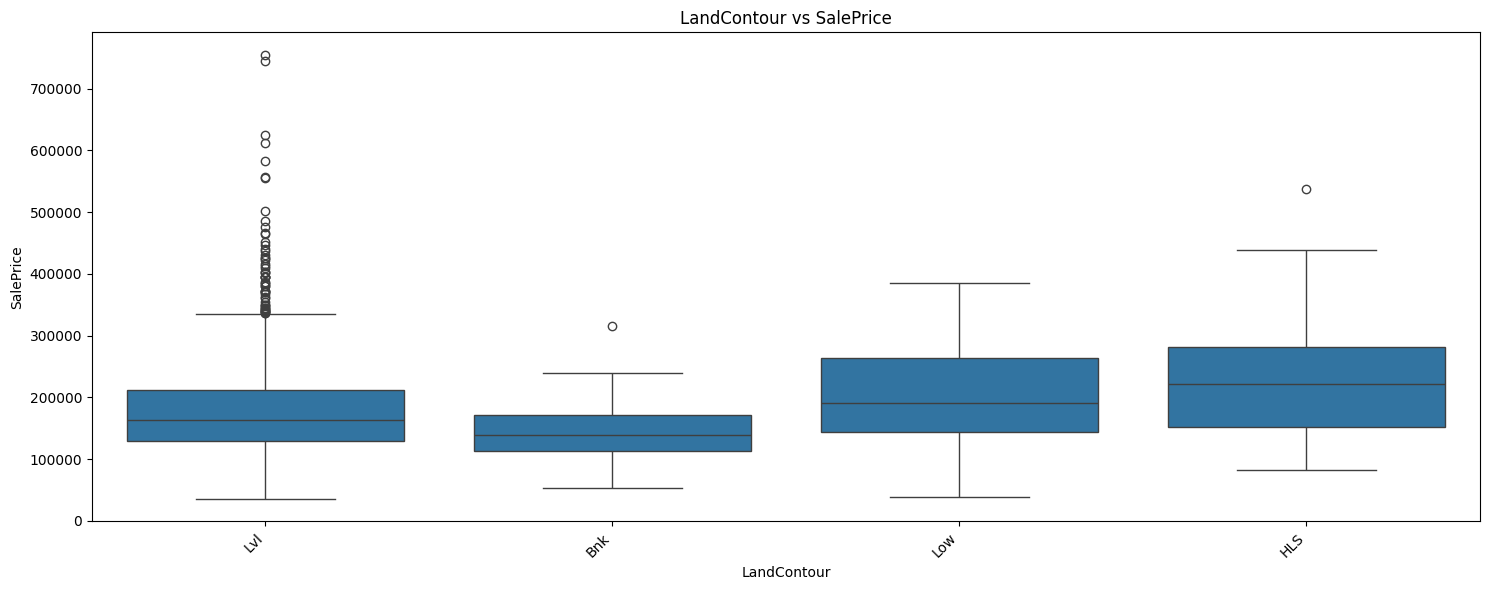


Value counts for LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


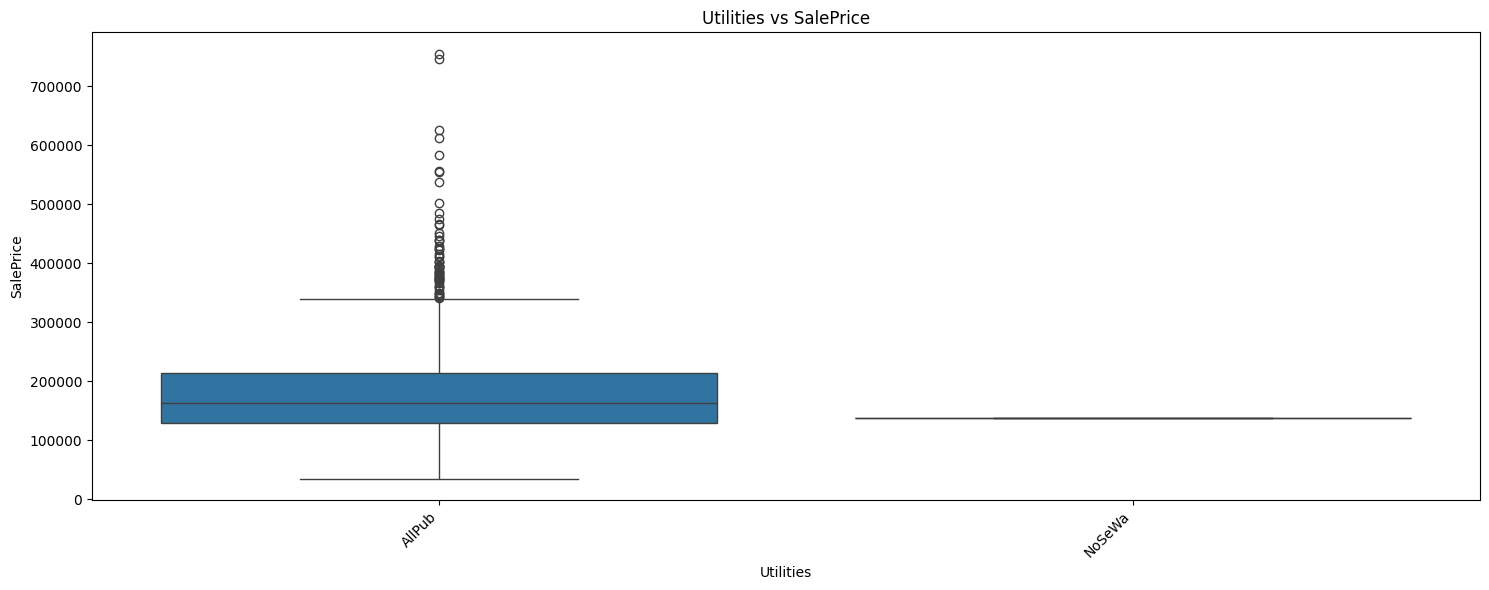


Value counts for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


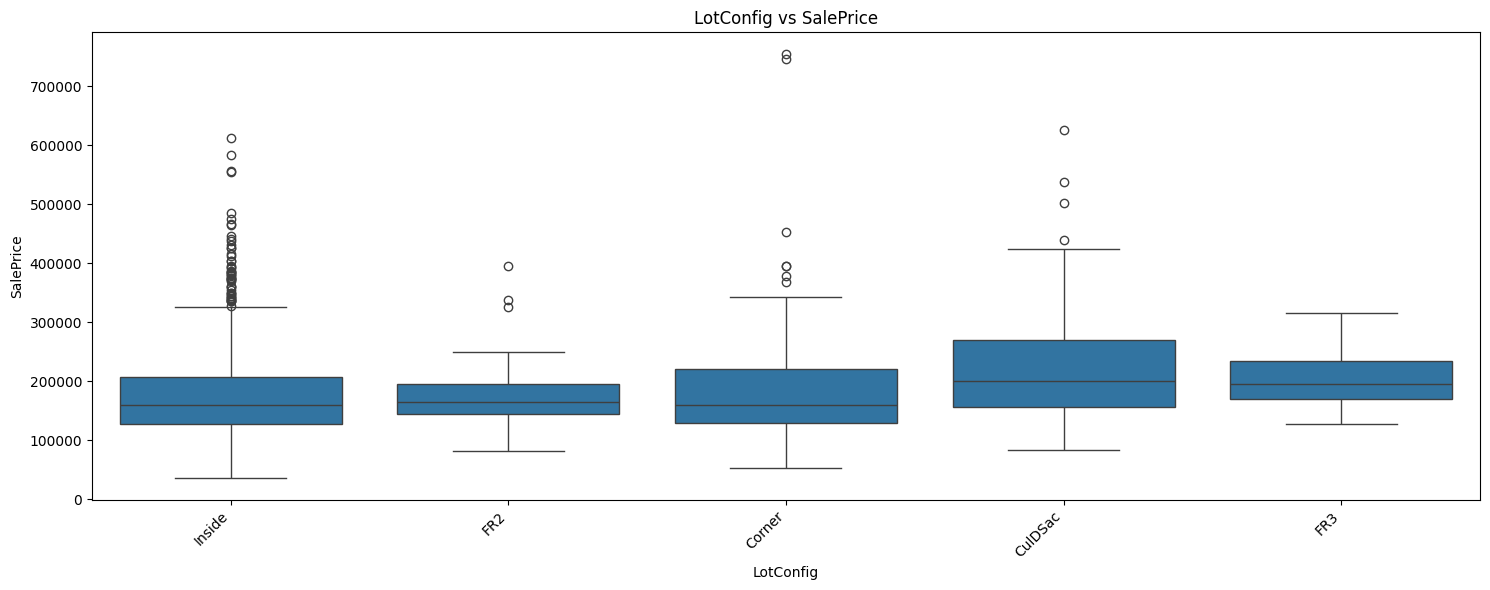


Value counts for LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


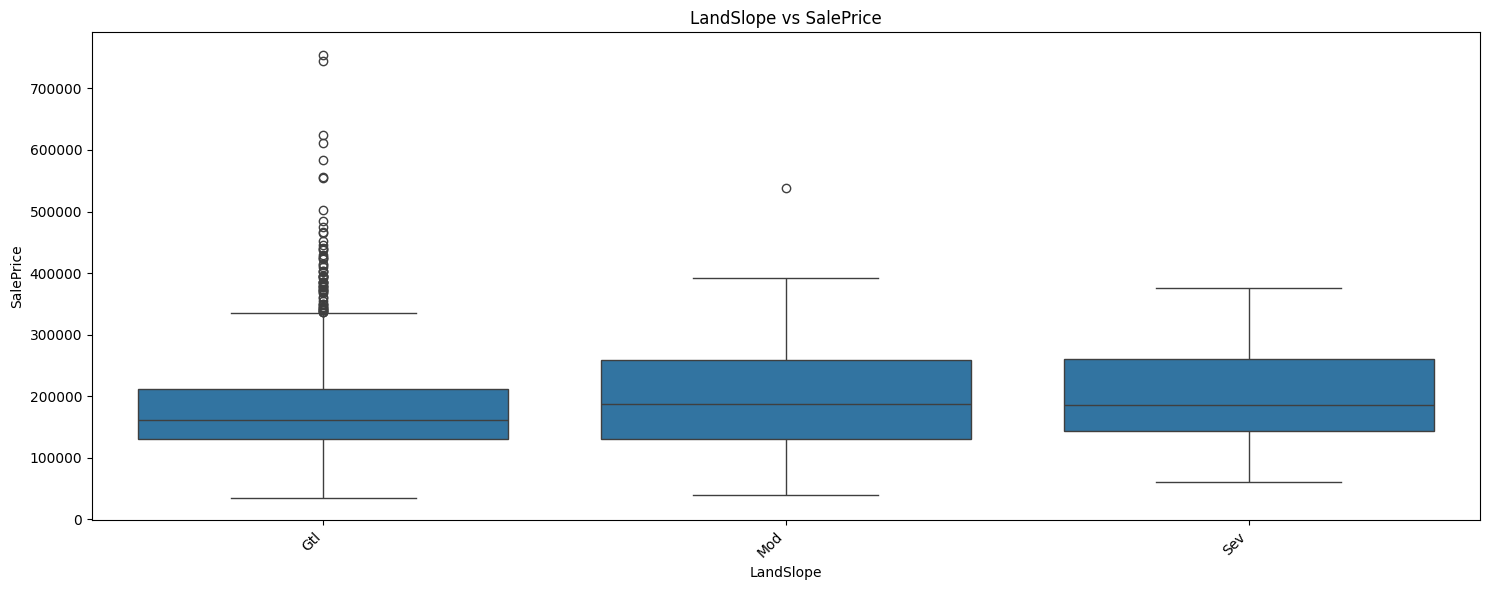


Value counts for LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


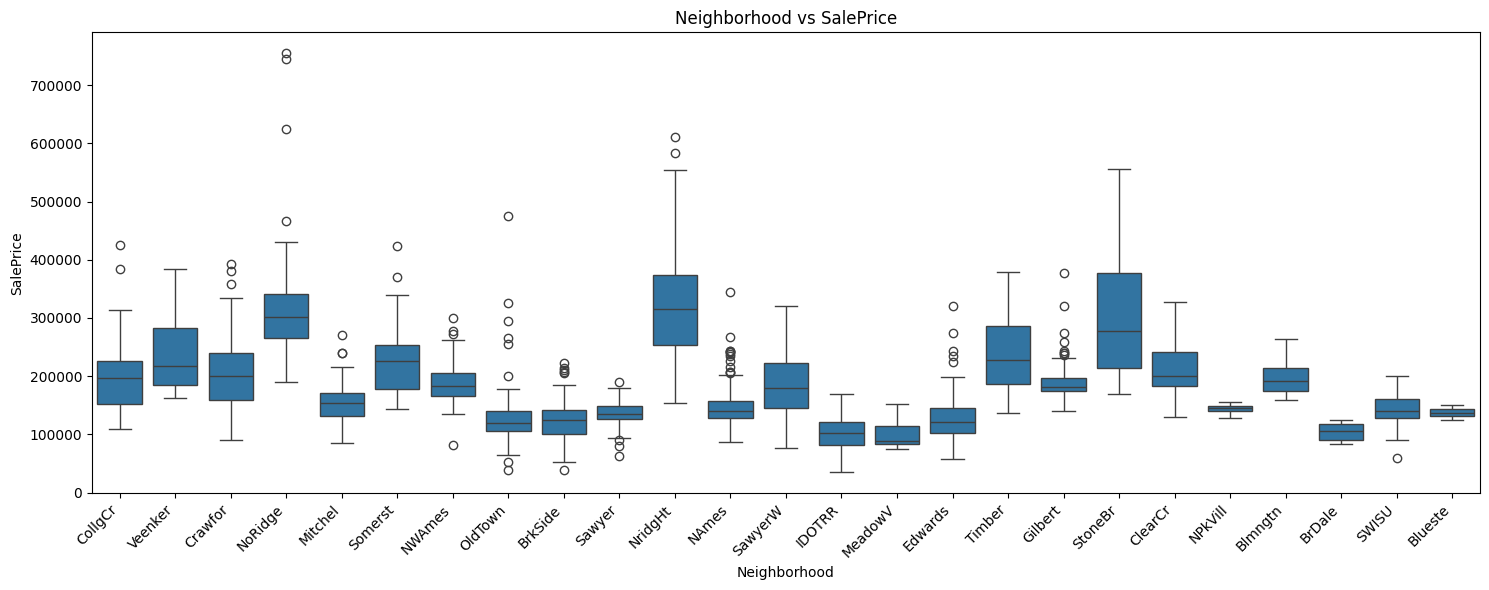


Value counts for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


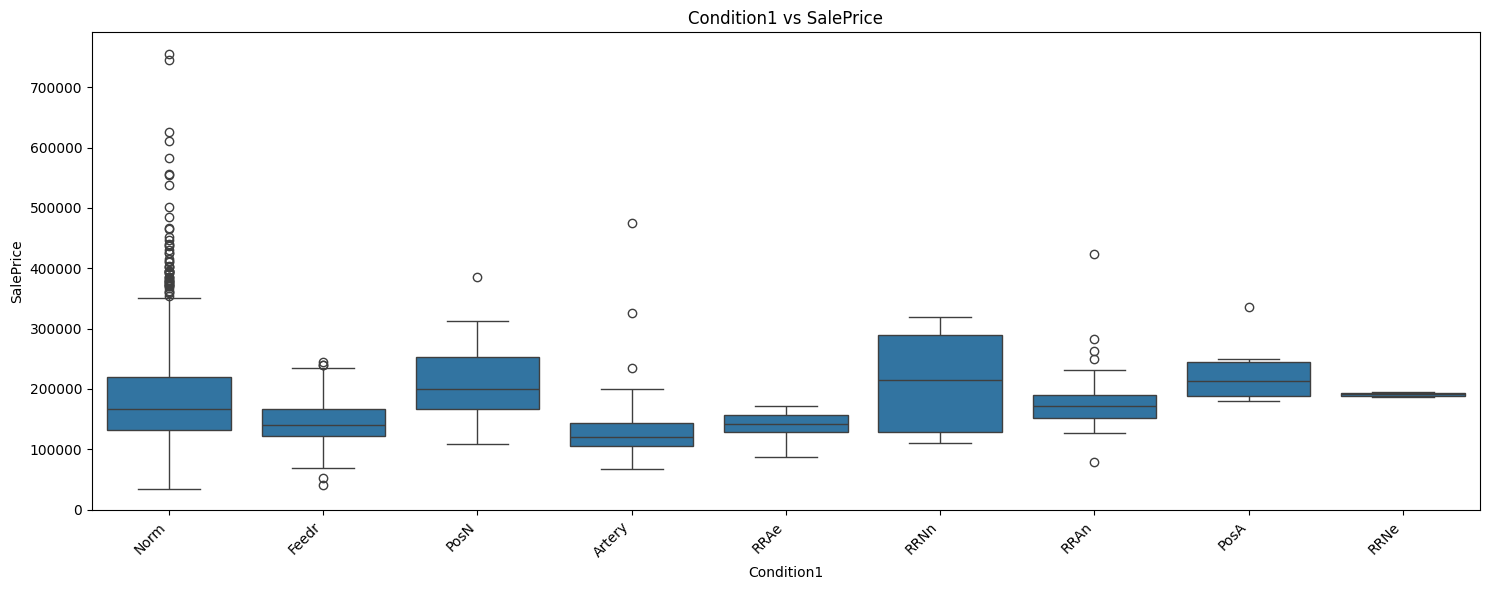


Value counts for Condition1:
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


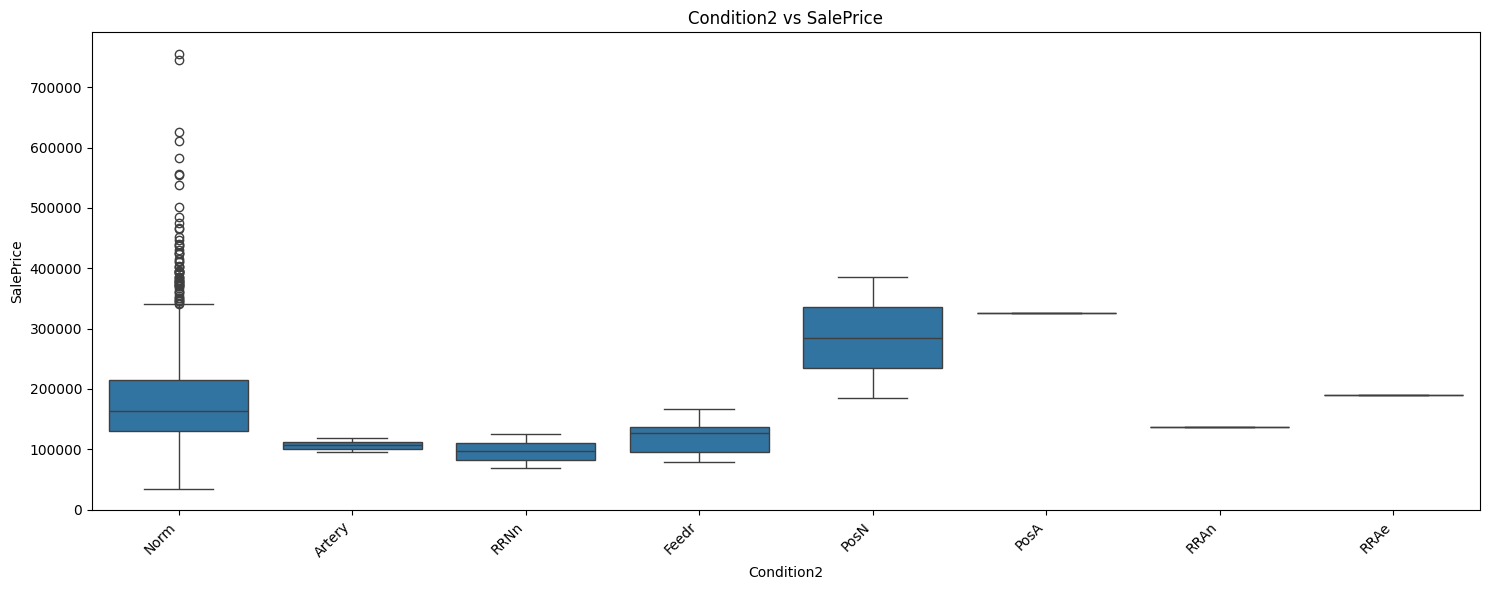


Value counts for Condition2:
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64


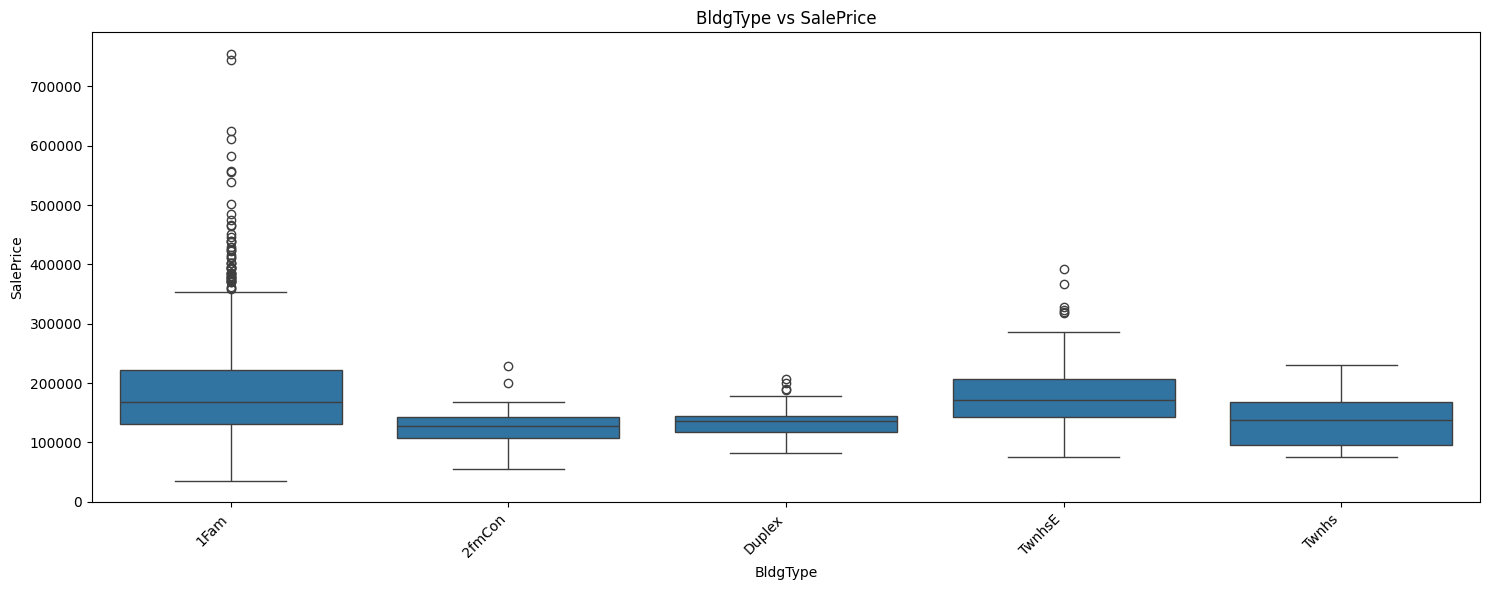


Value counts for BldgType:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


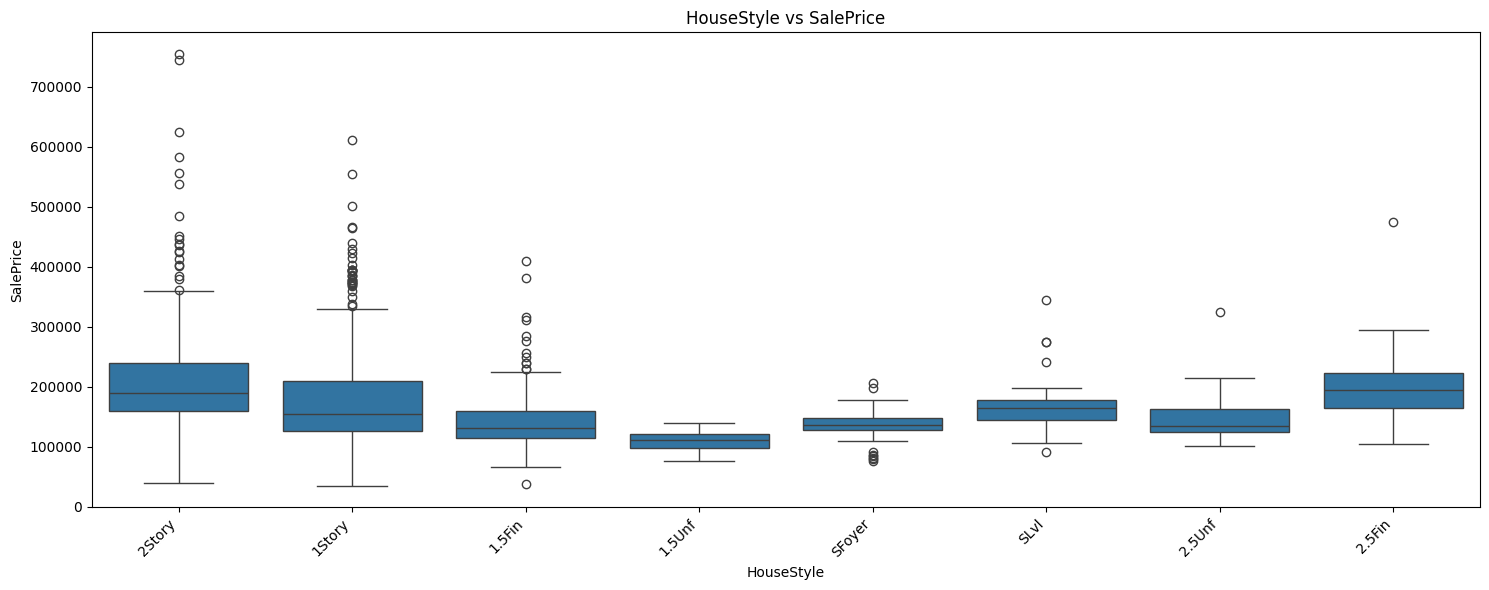


Value counts for HouseStyle:
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


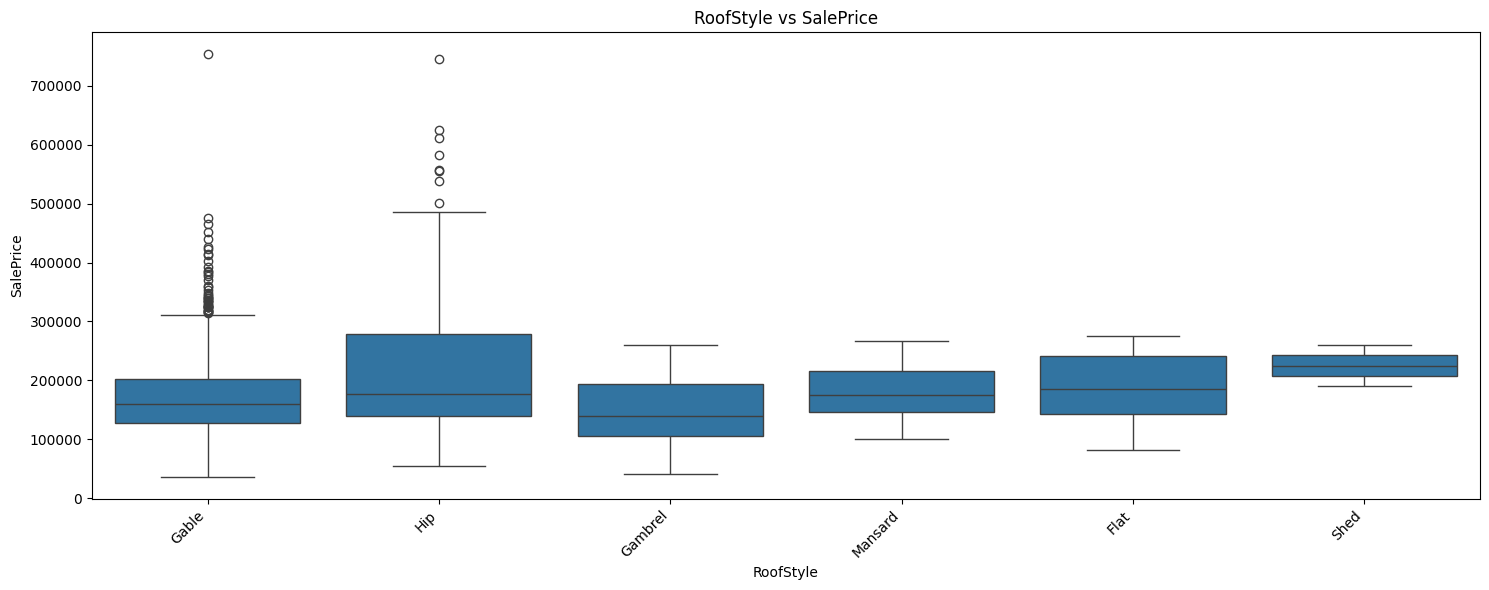


Value counts for RoofStyle:
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


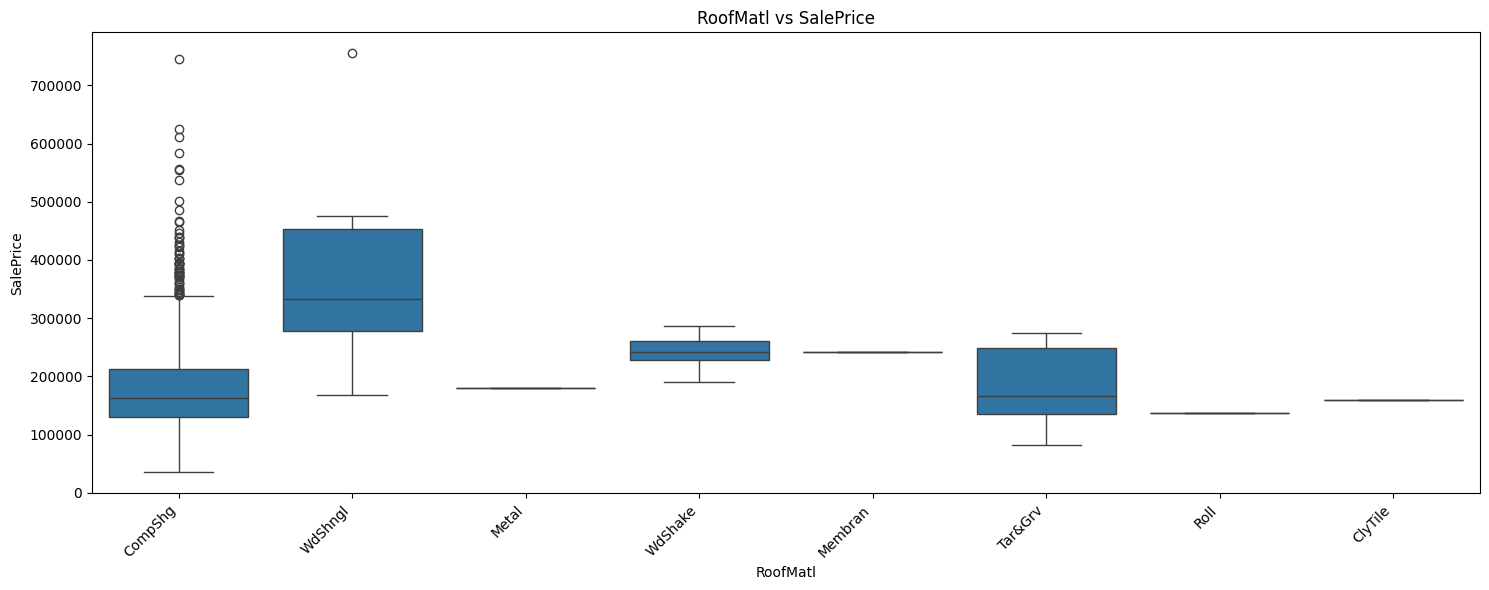


Value counts for RoofMatl:
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


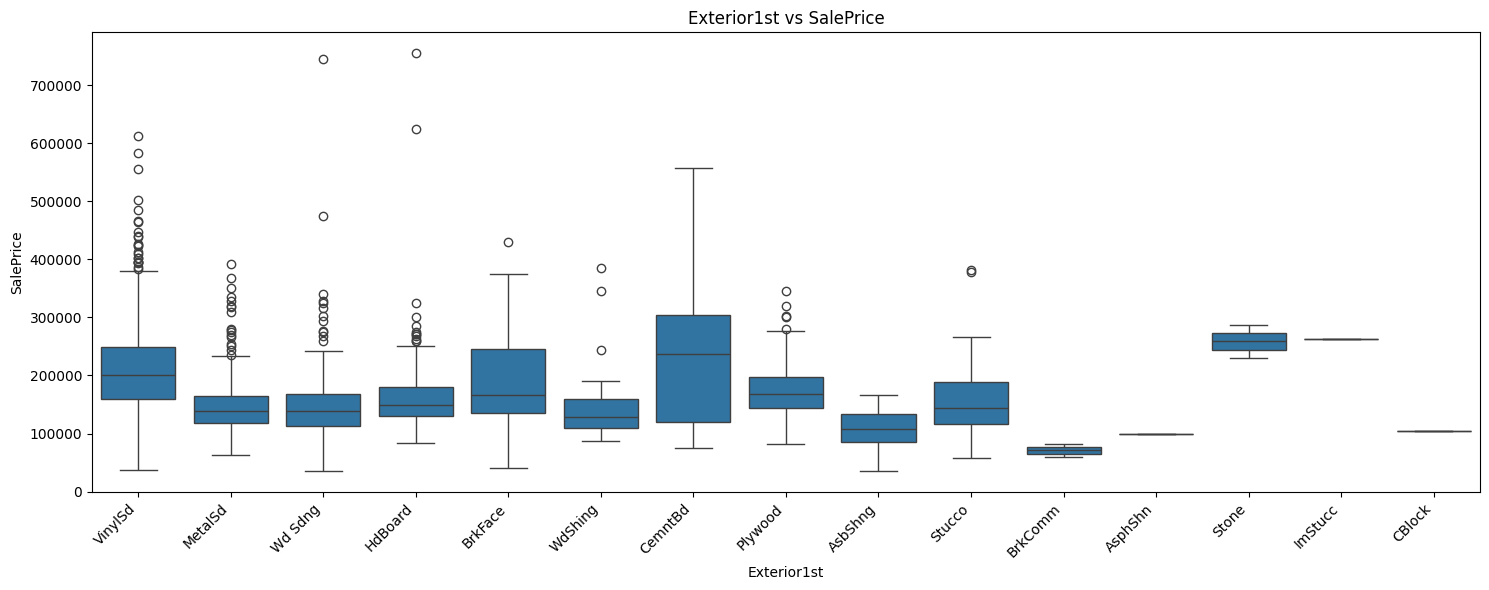


Value counts for Exterior1st:
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


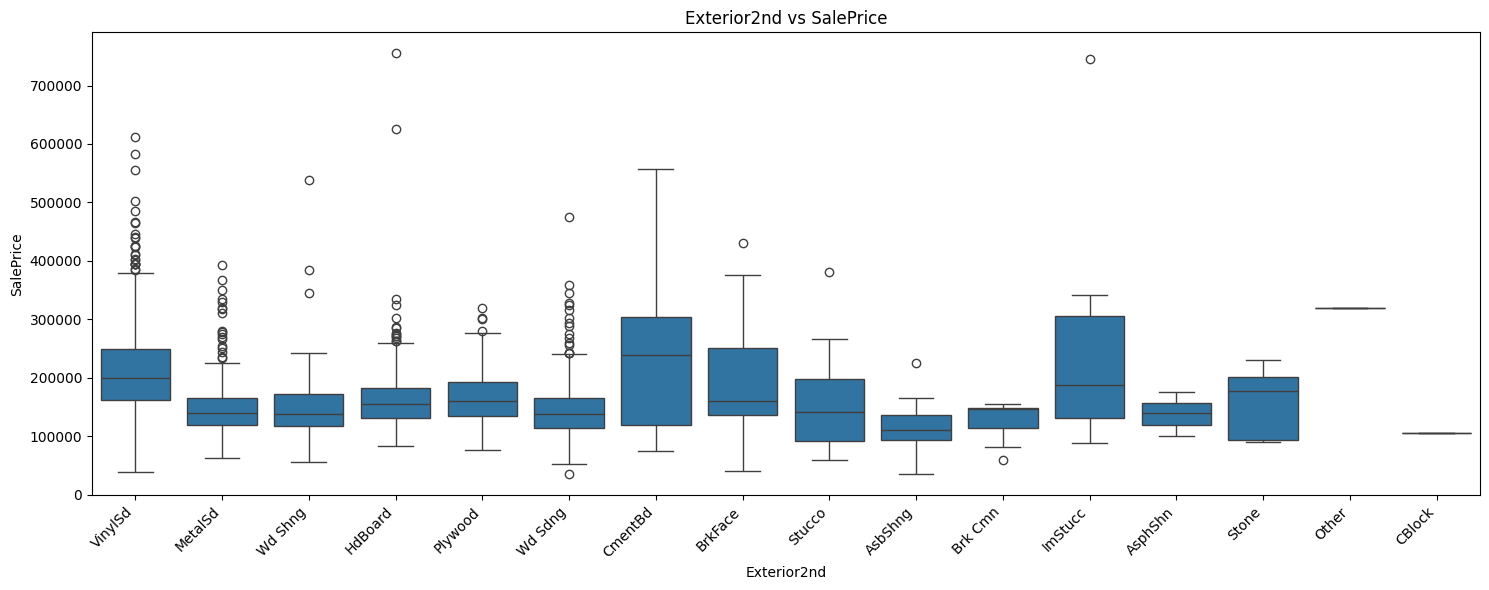


Value counts for Exterior2nd:
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


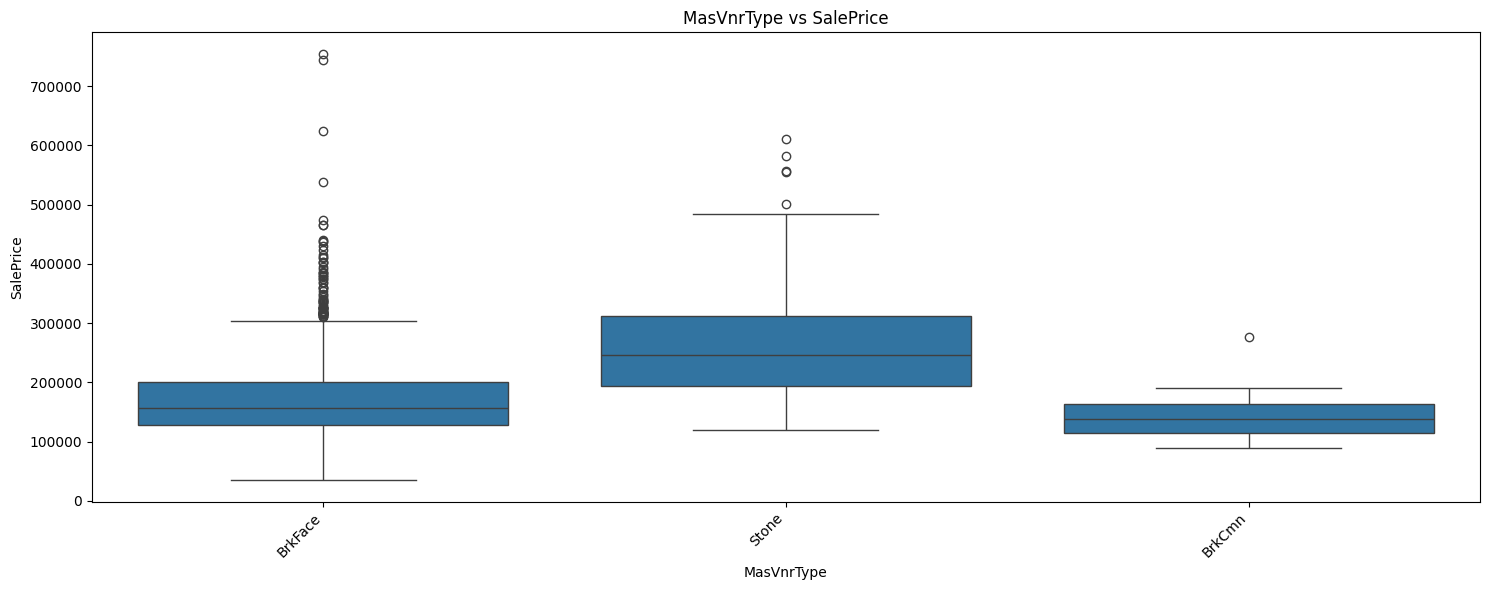


Value counts for MasVnrType:
MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64


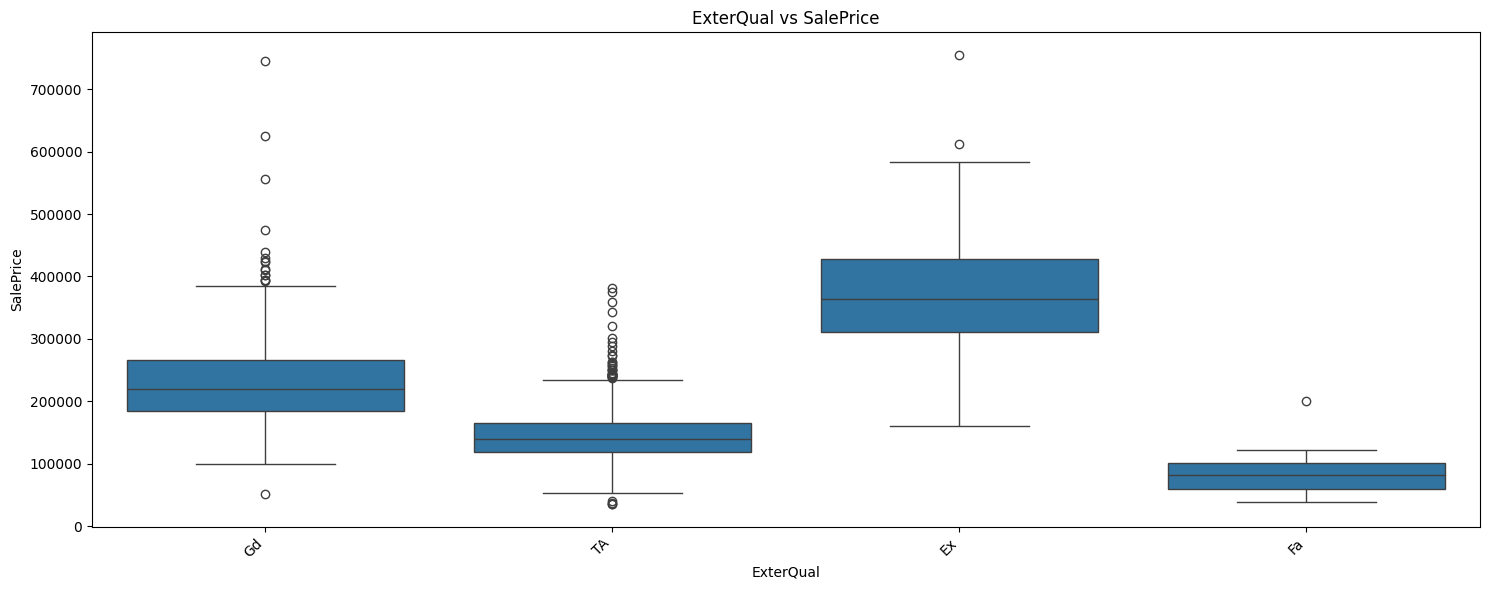


Value counts for ExterQual:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


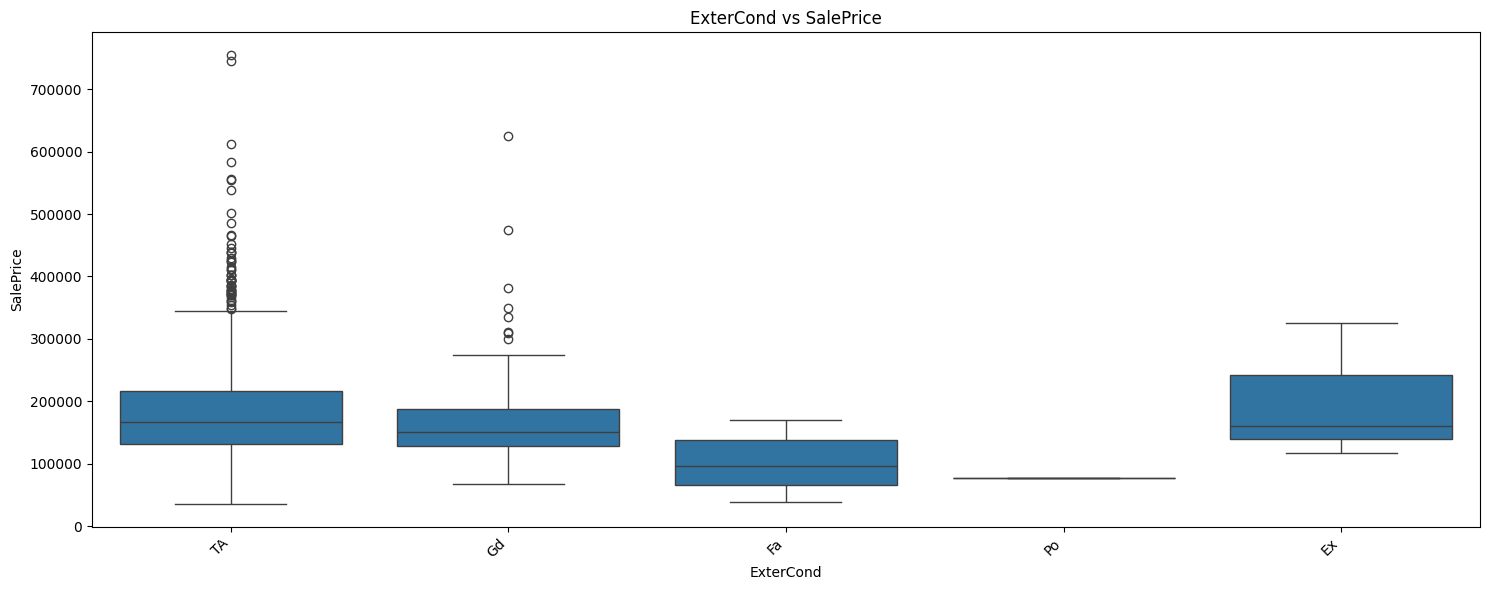


Value counts for ExterCond:
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


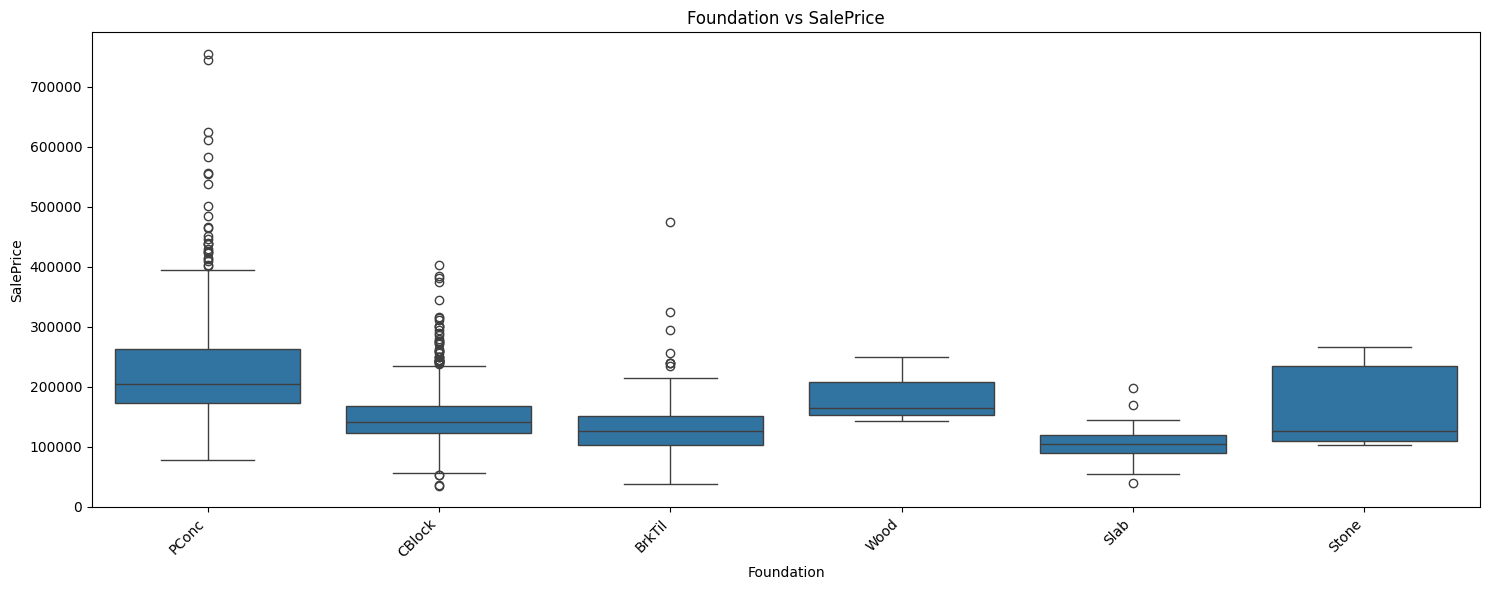


Value counts for Foundation:
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


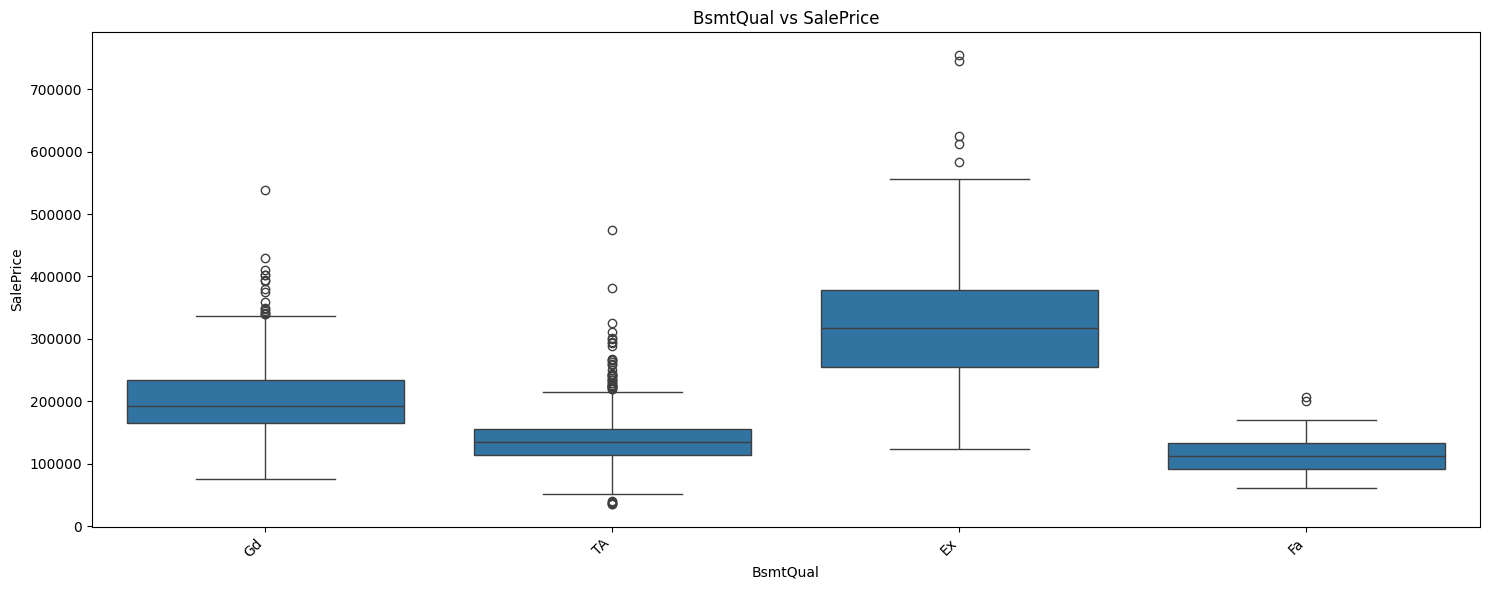


Value counts for BsmtQual:
BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


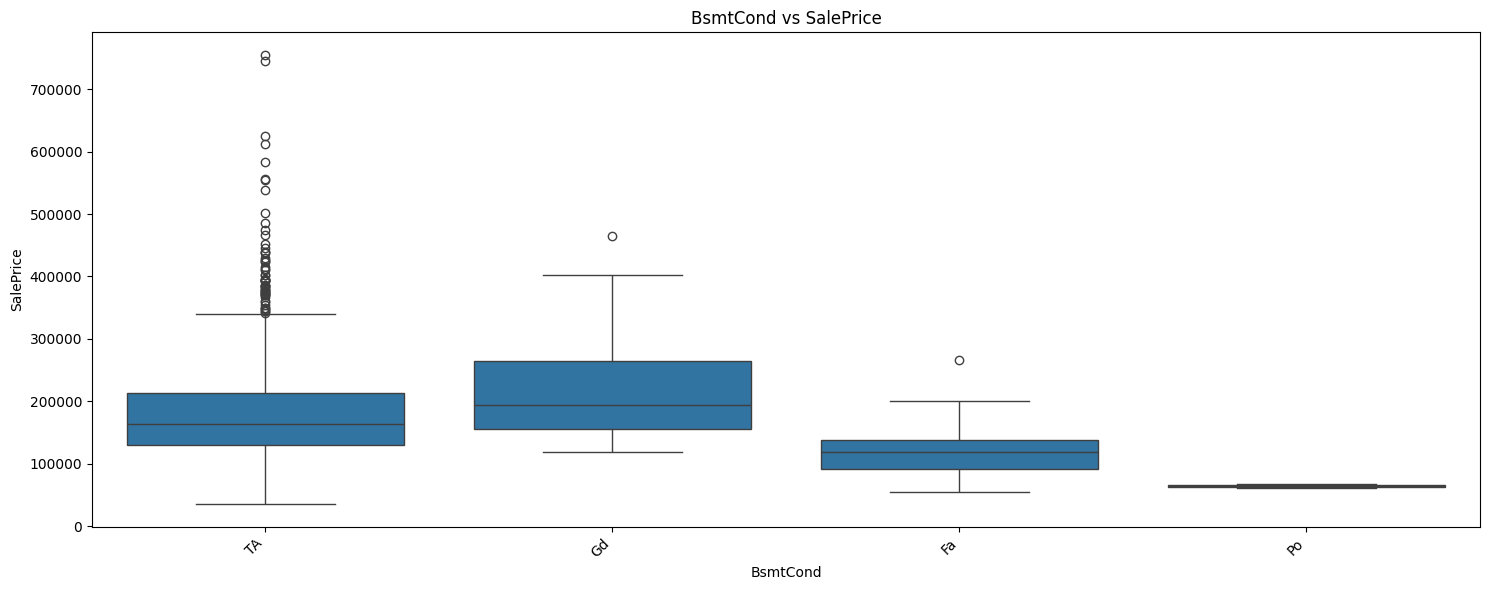


Value counts for BsmtCond:
BsmtCond
TA    1348
Gd      65
Fa      45
Po       2
Name: count, dtype: int64


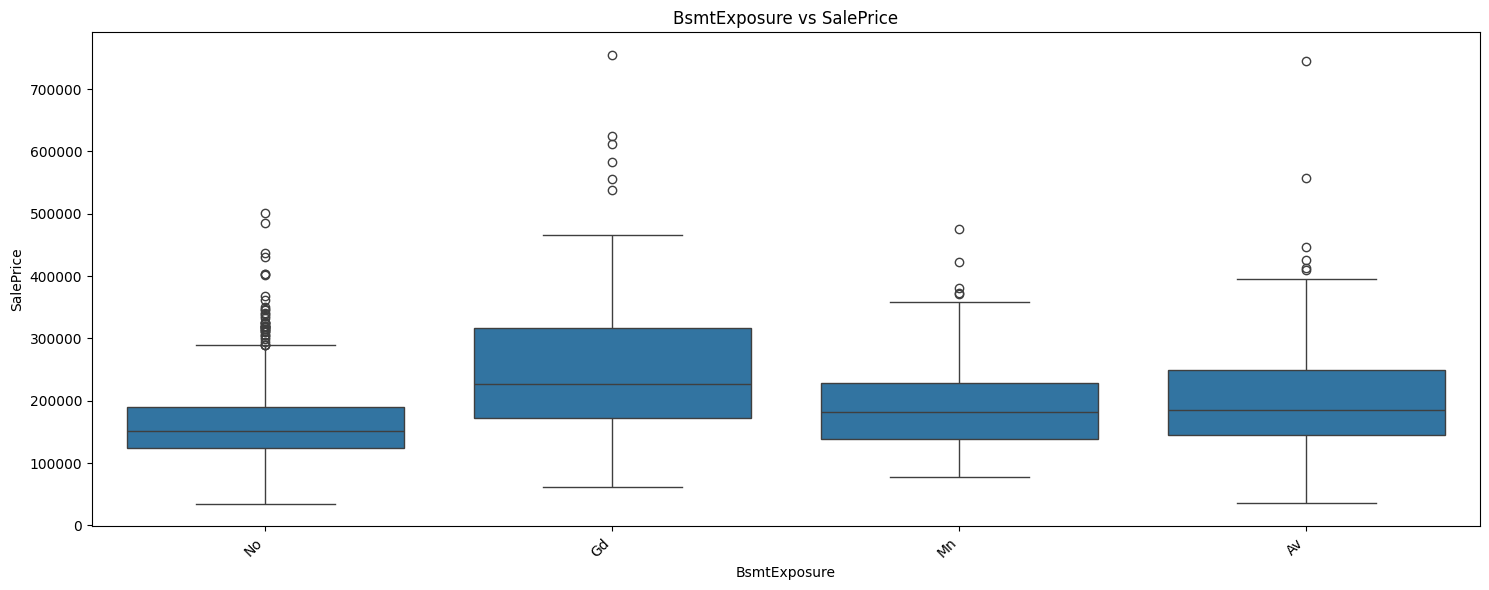


Value counts for BsmtExposure:
BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


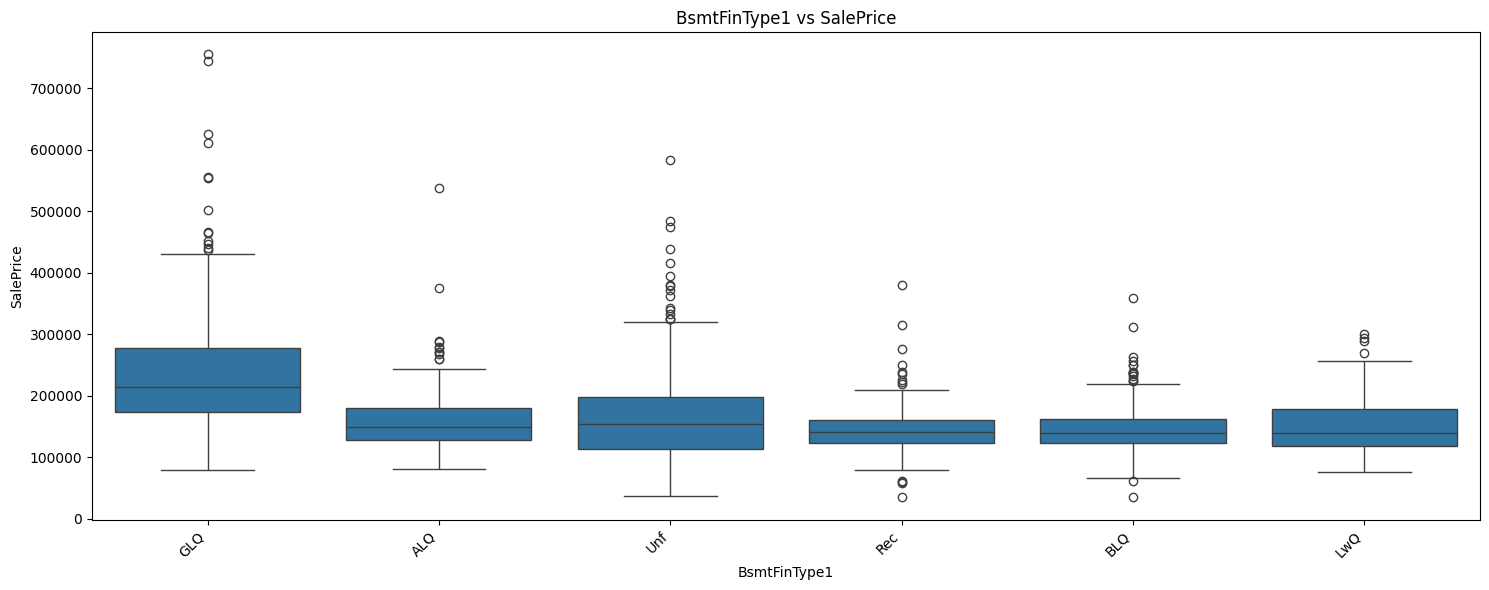


Value counts for BsmtFinType1:
BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64


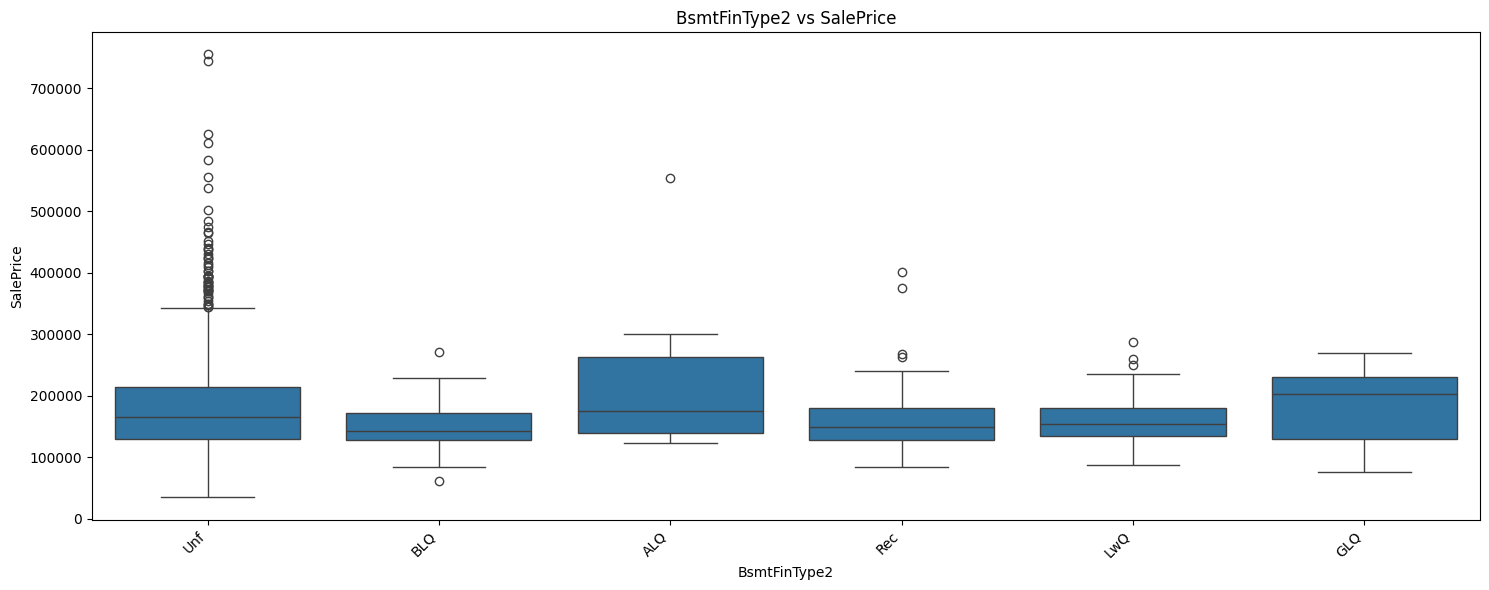


Value counts for BsmtFinType2:
BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


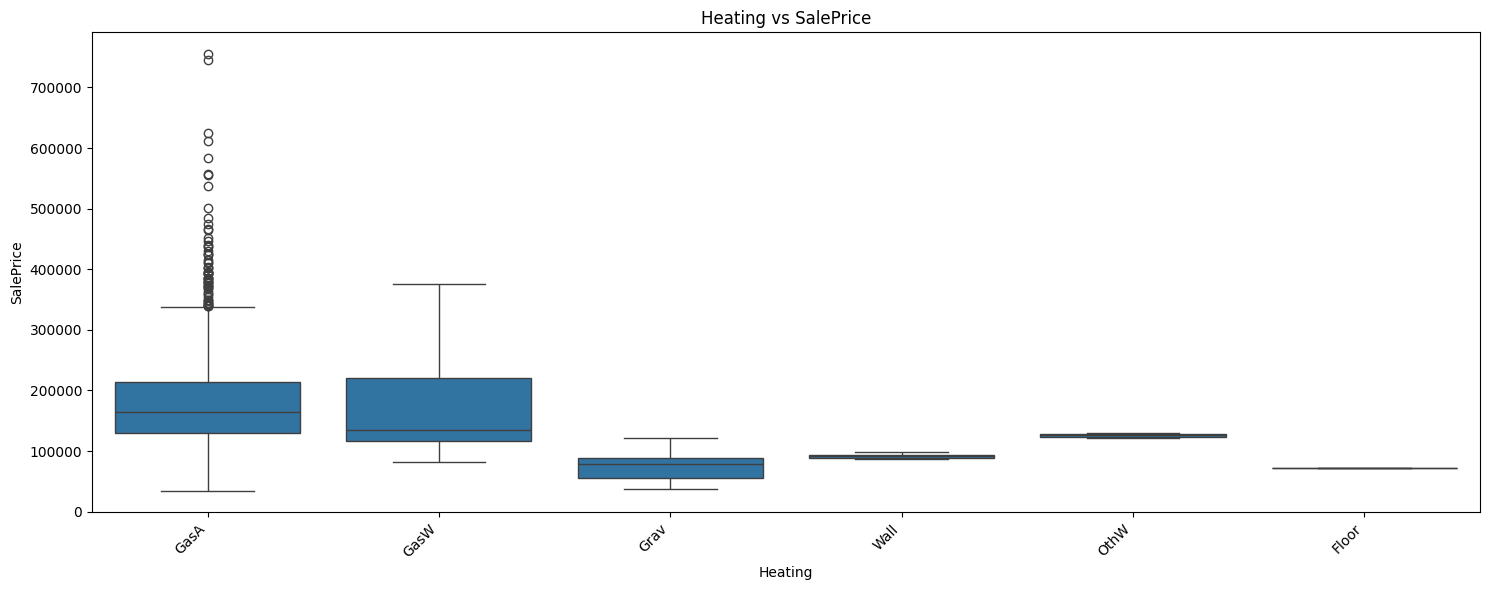


Value counts for Heating:
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


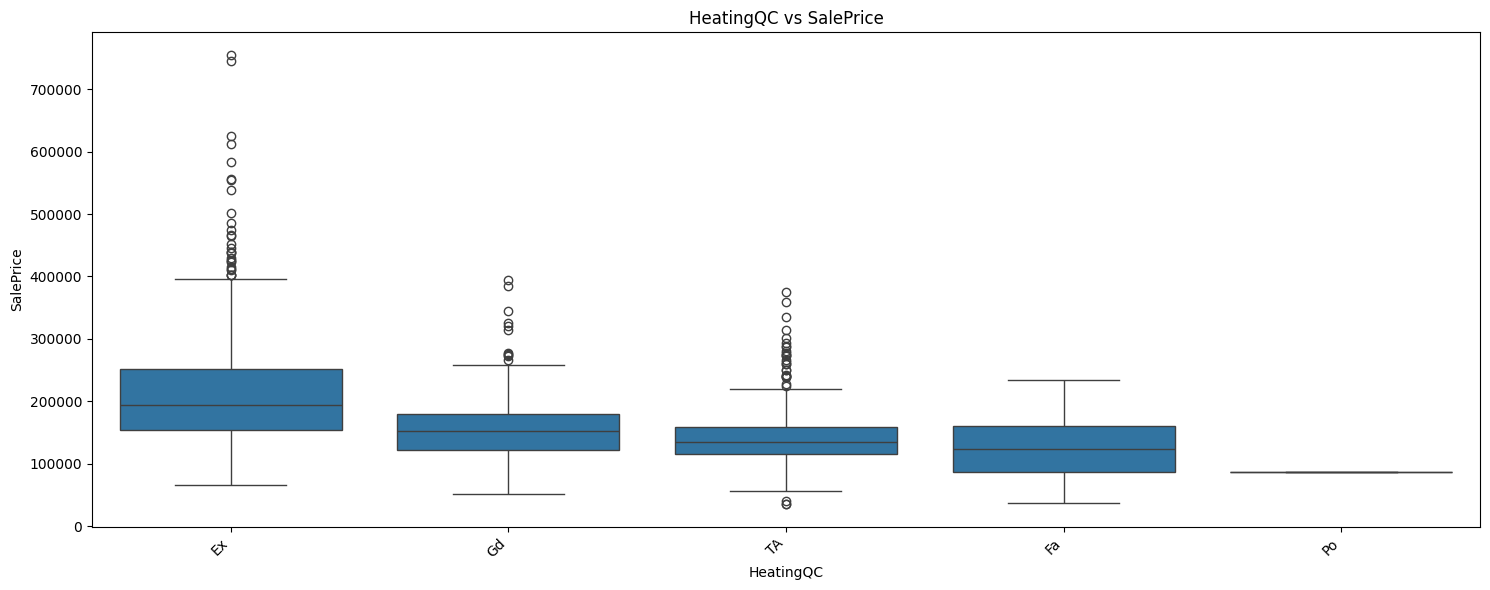


Value counts for HeatingQC:
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


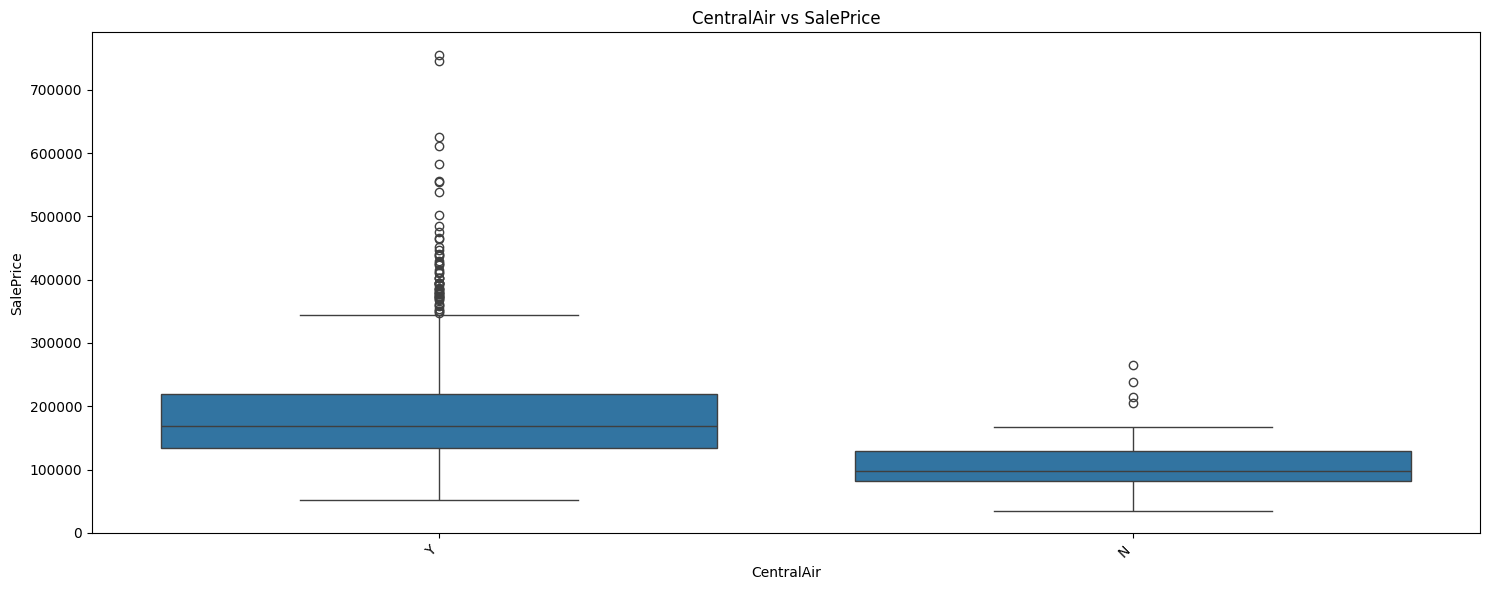


Value counts for CentralAir:
CentralAir
Y    1365
N      95
Name: count, dtype: int64


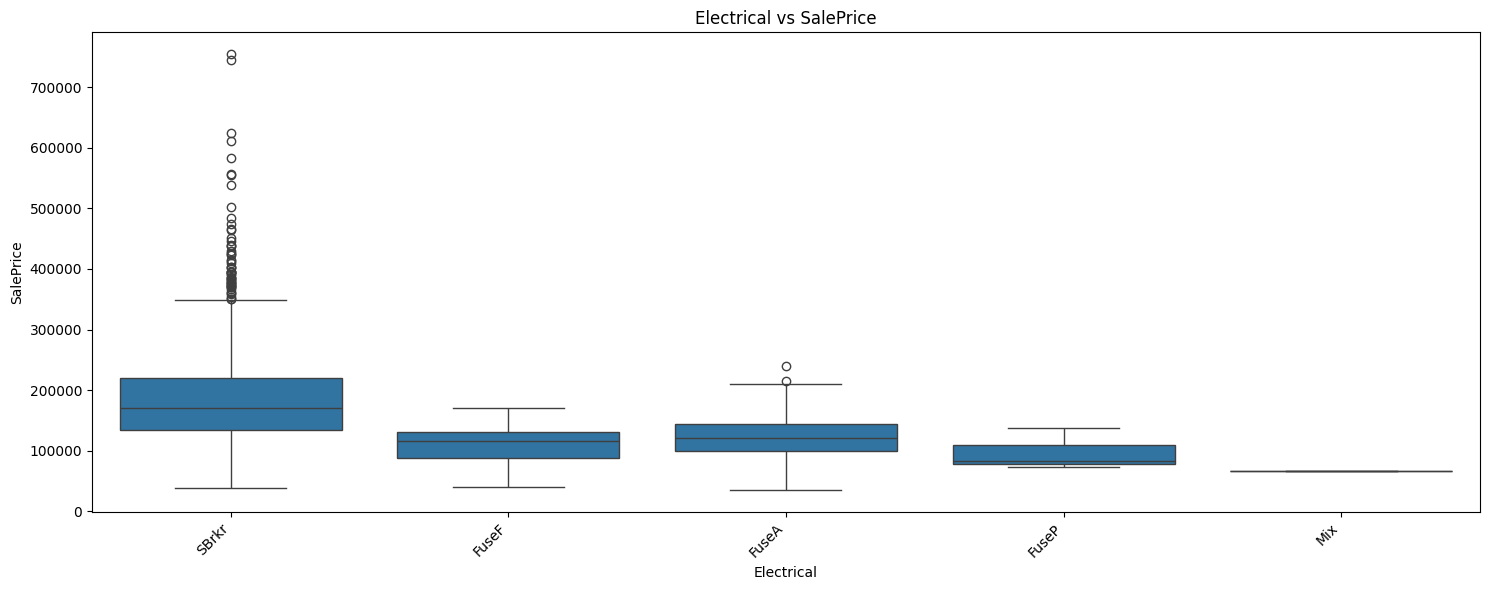


Value counts for Electrical:
Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


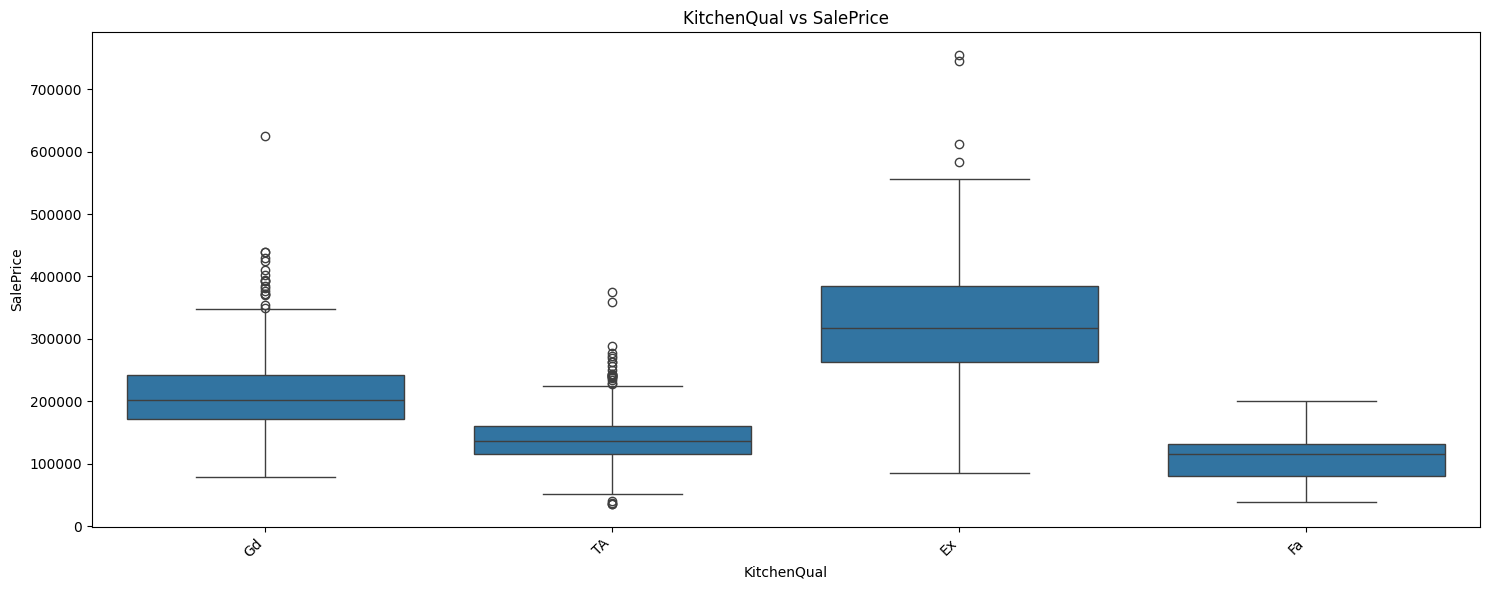


Value counts for KitchenQual:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


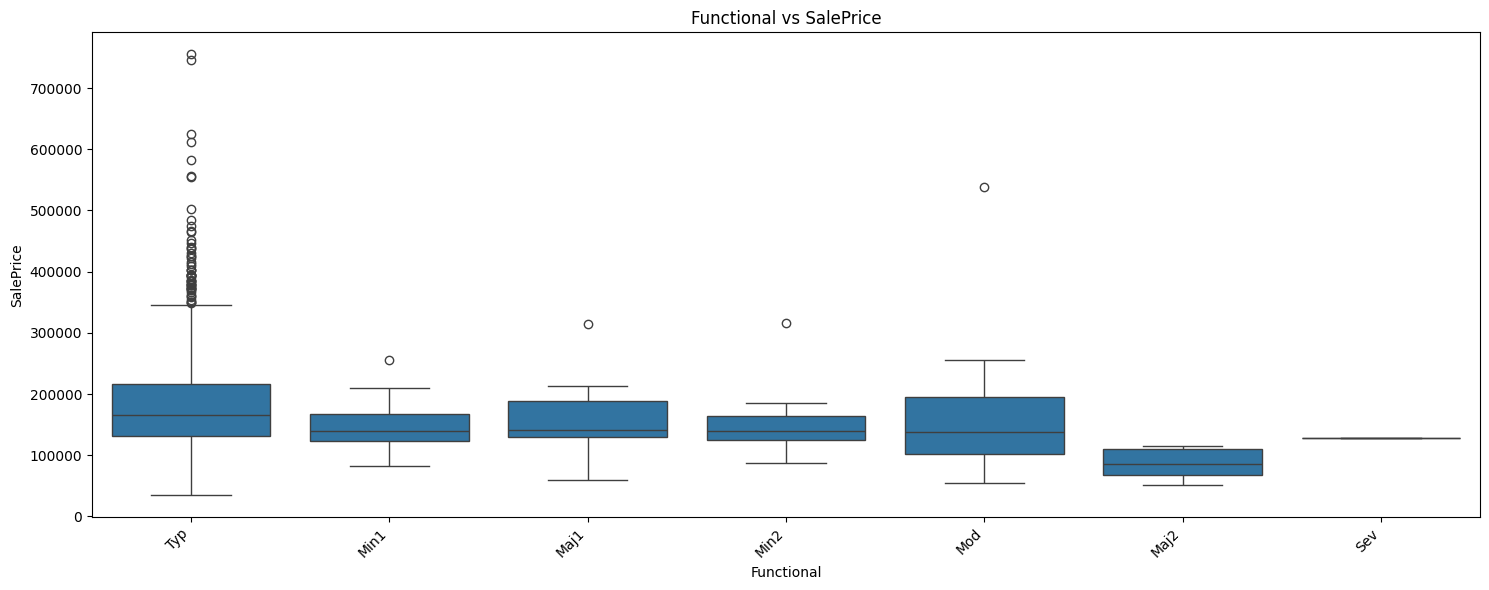


Value counts for Functional:
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


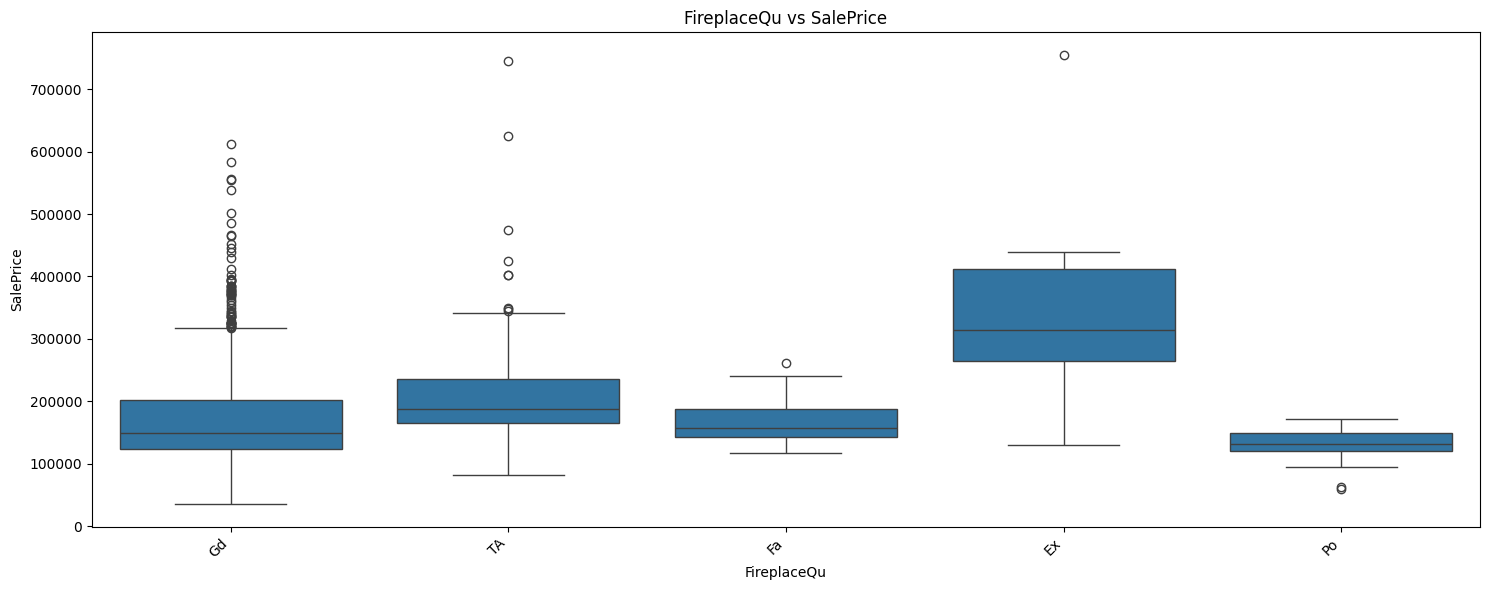


Value counts for FireplaceQu:
FireplaceQu
Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64


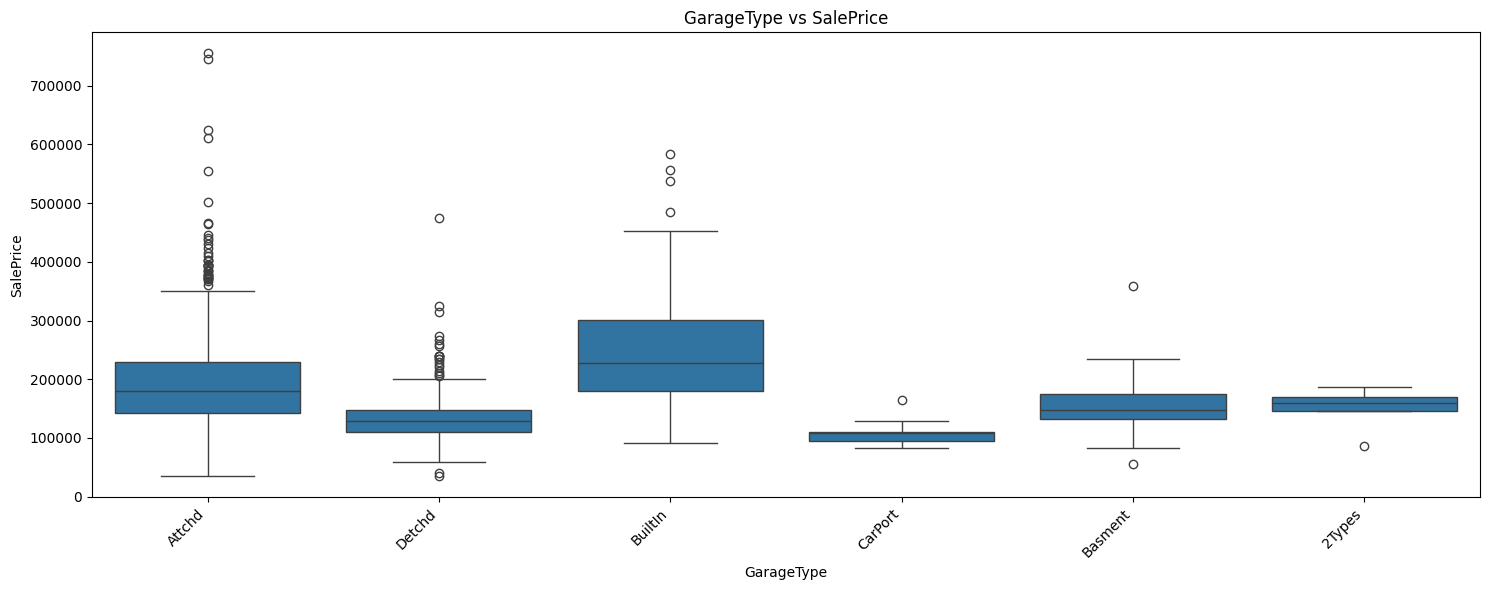


Value counts for GarageType:
GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


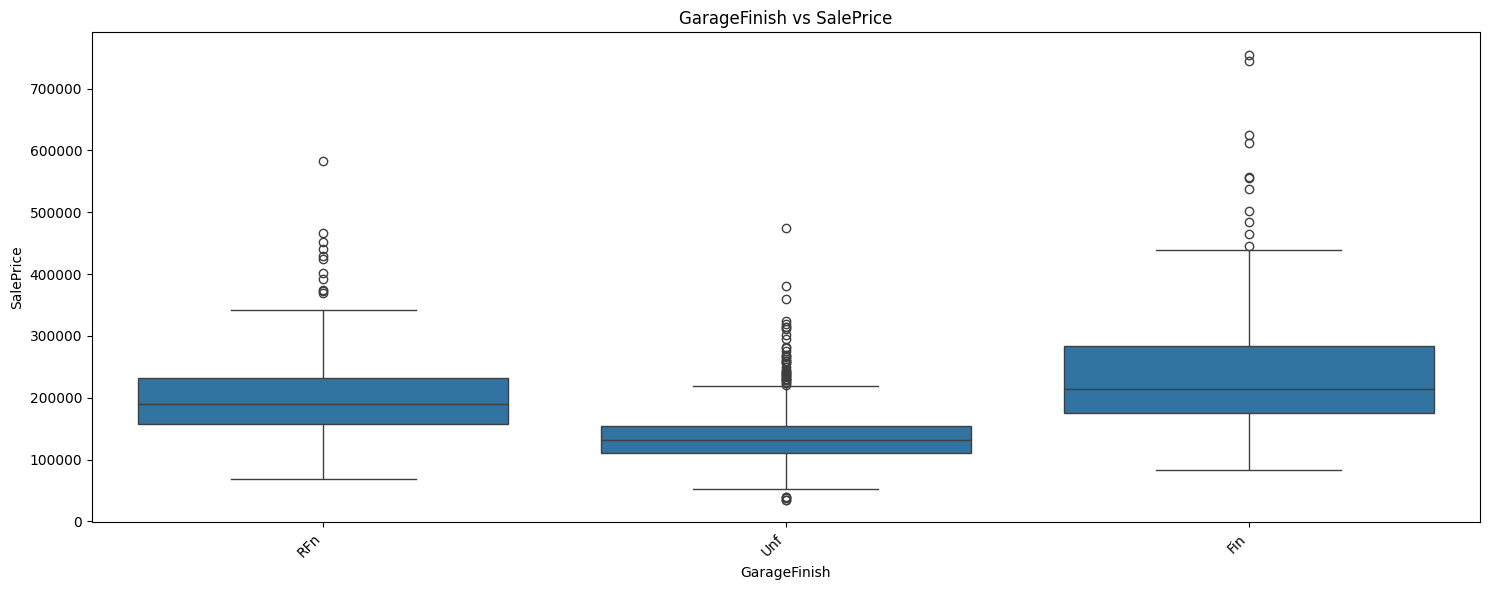


Value counts for GarageFinish:
GarageFinish
Unf    686
RFn    422
Fin    352
Name: count, dtype: int64


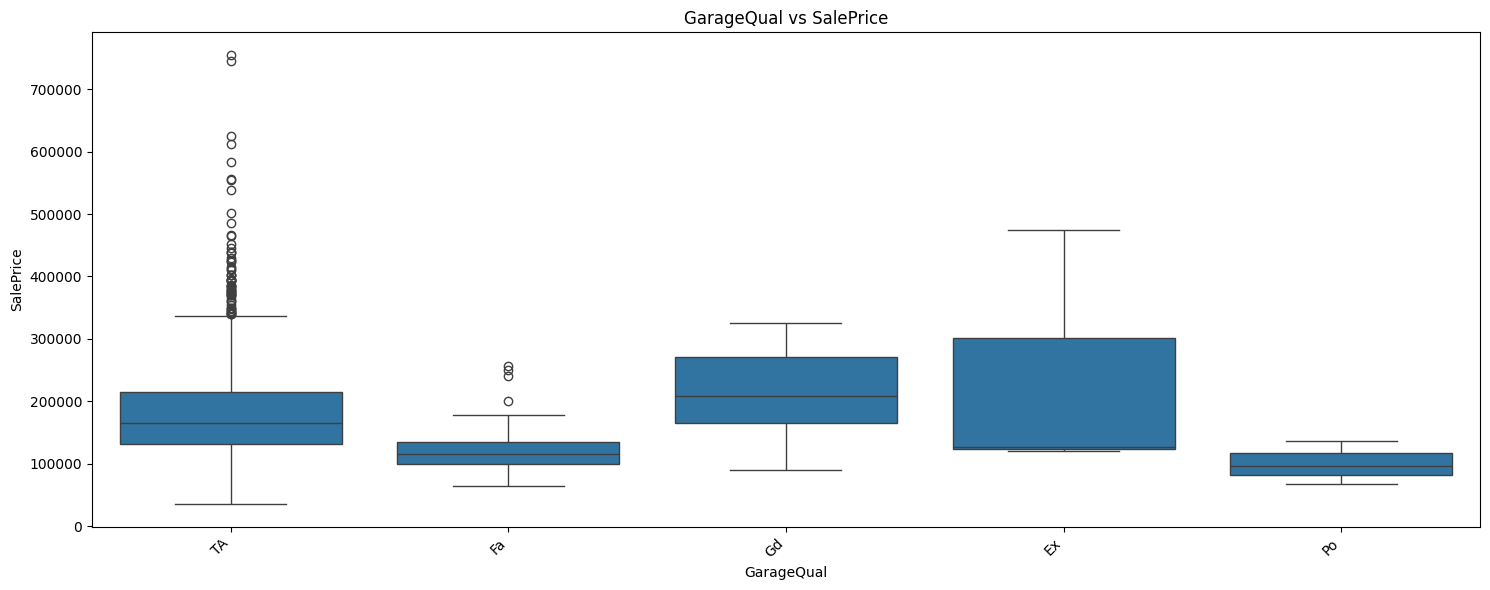


Value counts for GarageQual:
GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


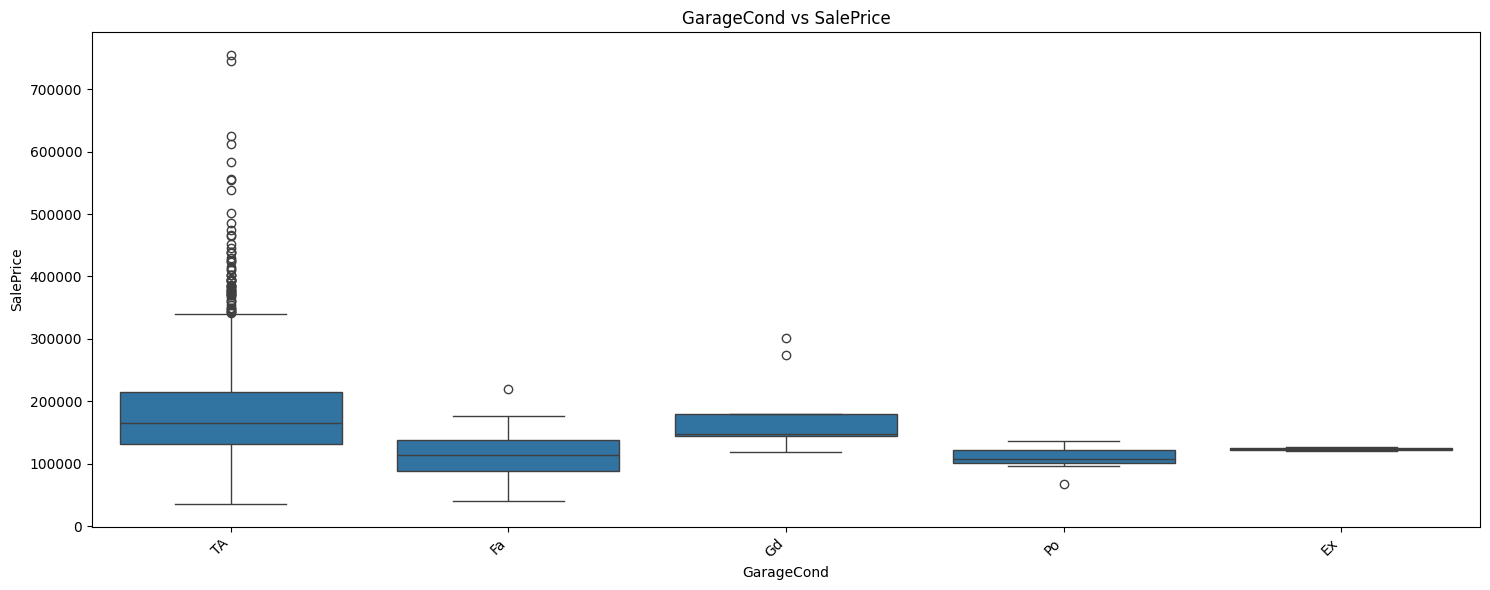


Value counts for GarageCond:
GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


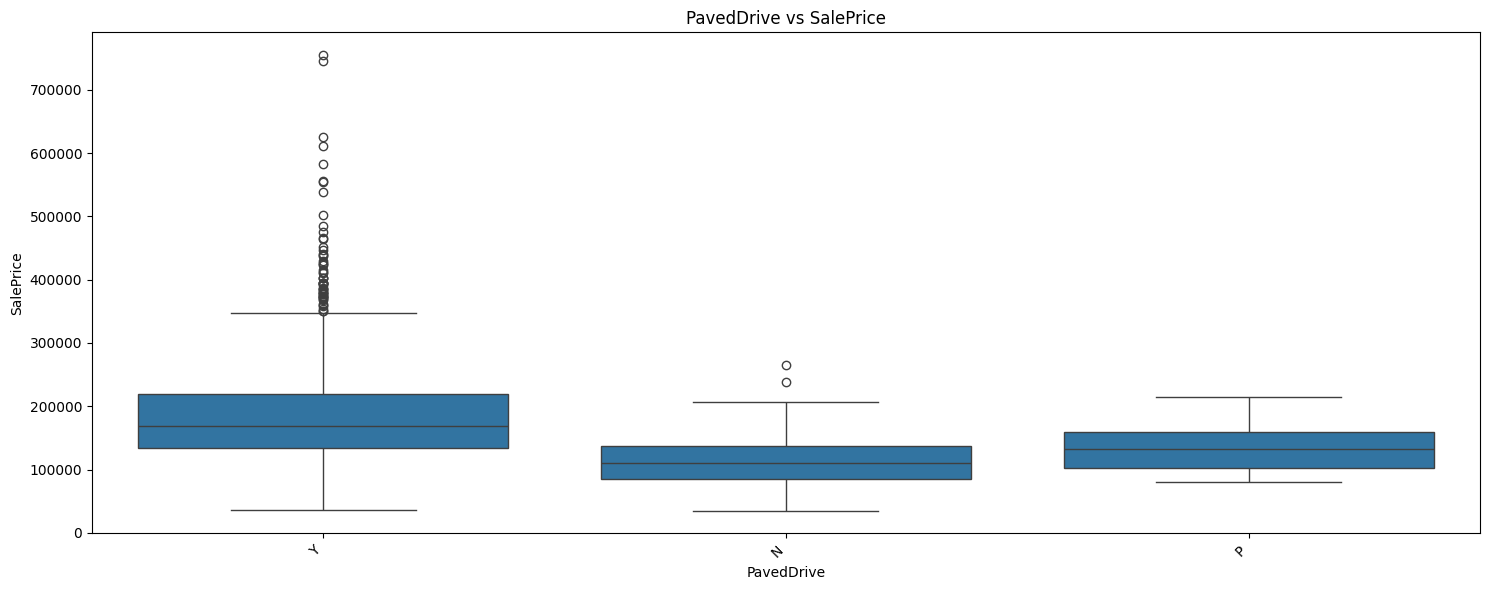


Value counts for PavedDrive:
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


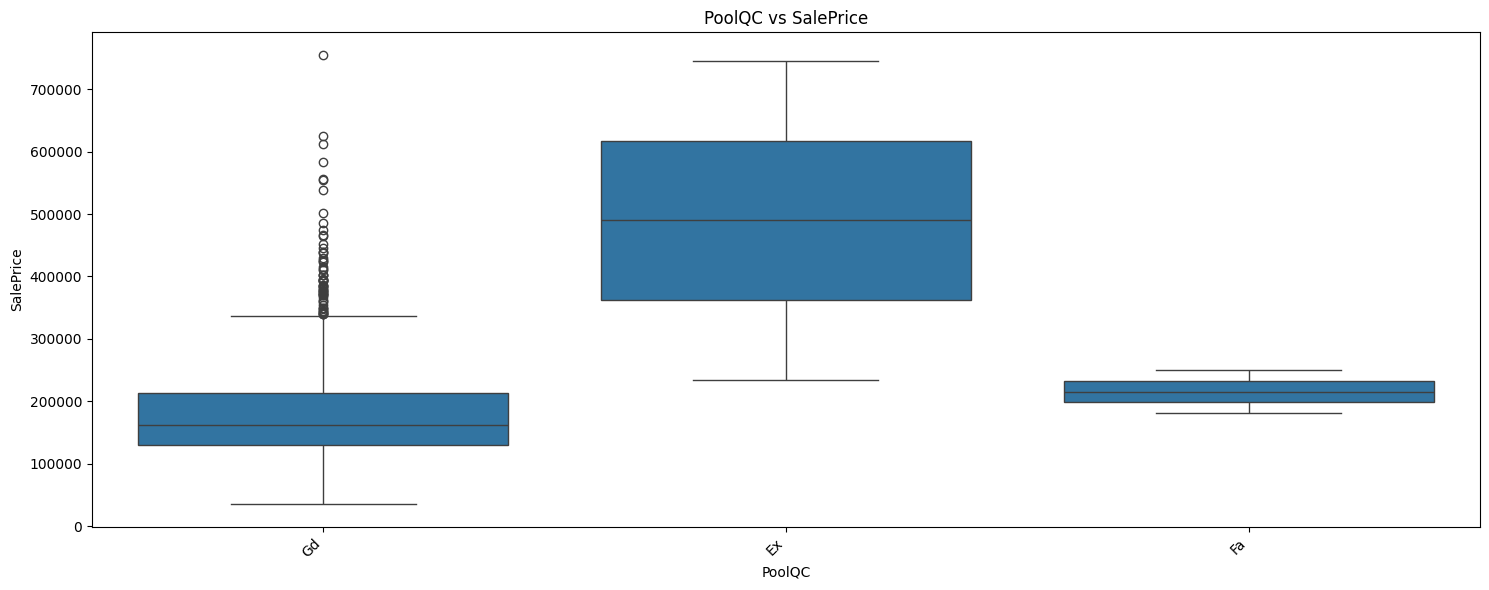


Value counts for PoolQC:
PoolQC
Gd    1456
Ex       2
Fa       2
Name: count, dtype: int64


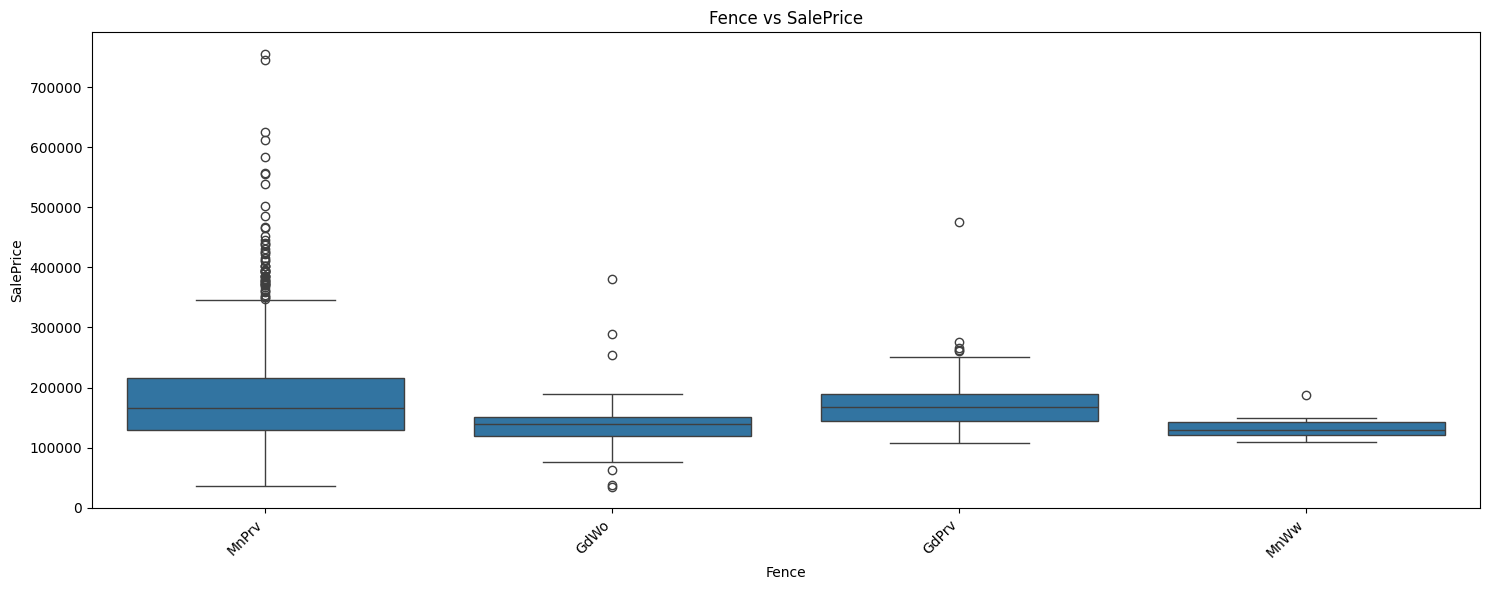


Value counts for Fence:
Fence
MnPrv    1336
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64


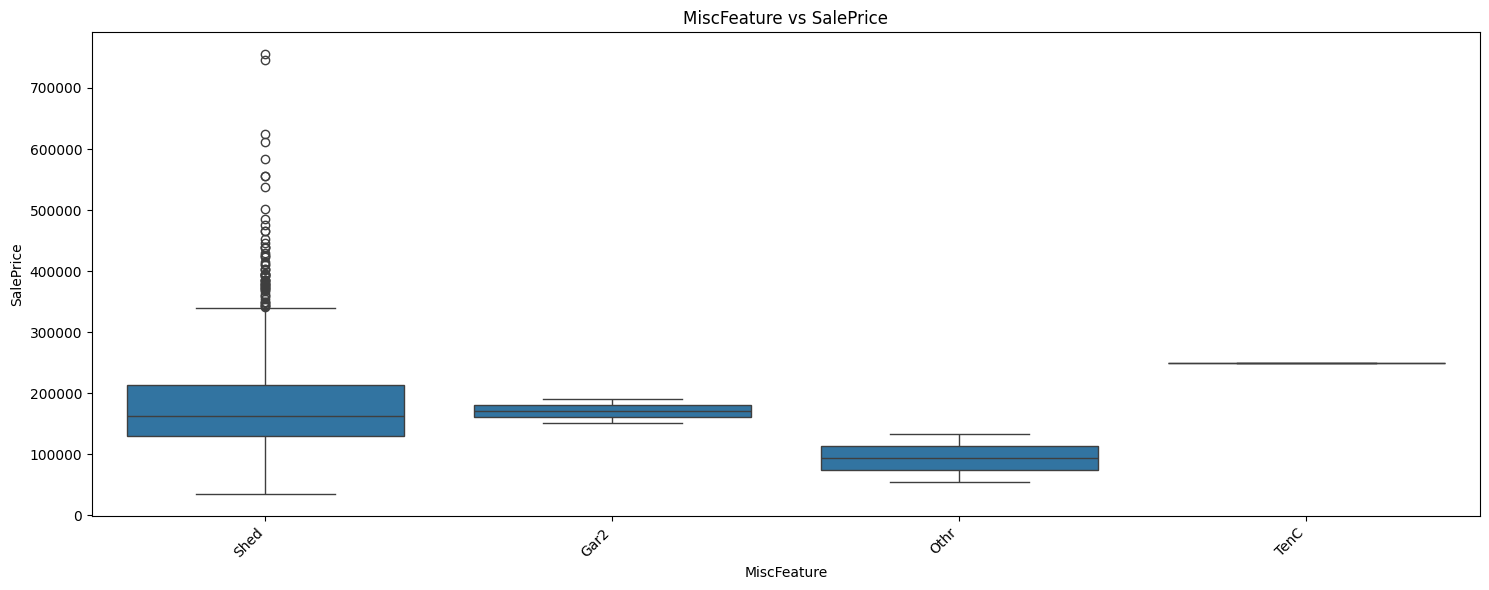


Value counts for MiscFeature:
MiscFeature
Shed    1455
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


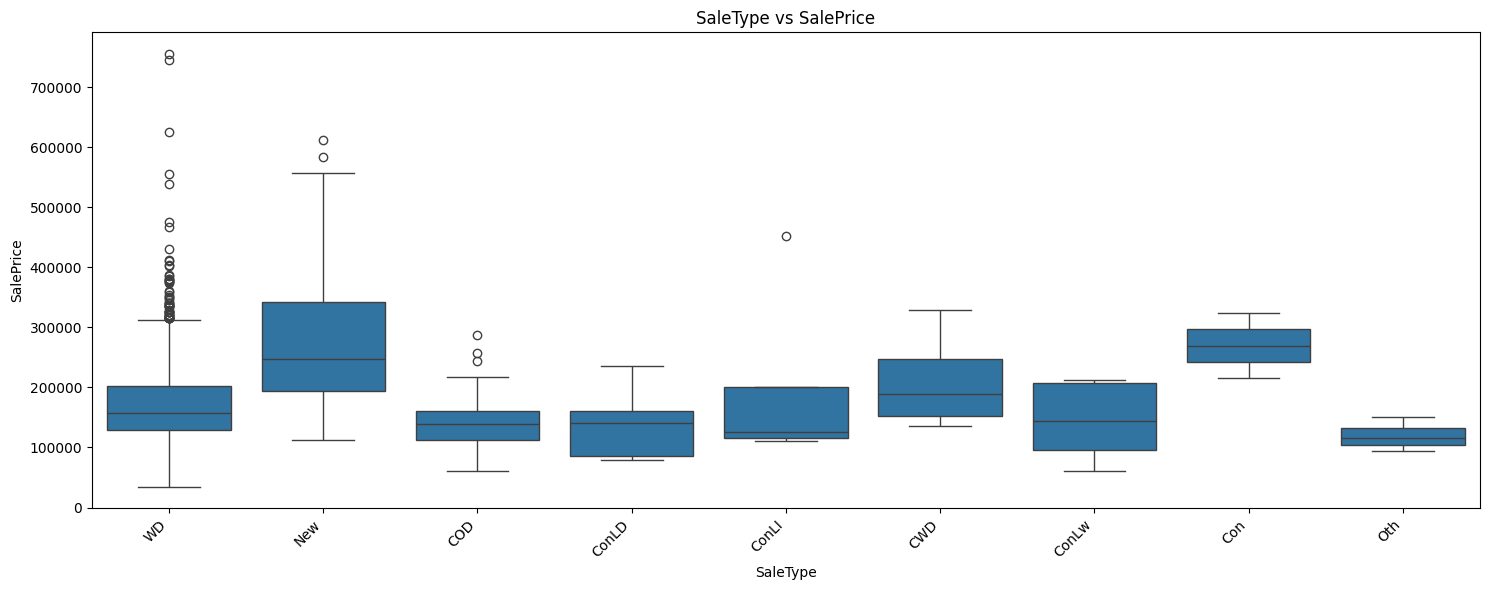


Value counts for SaleType:
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


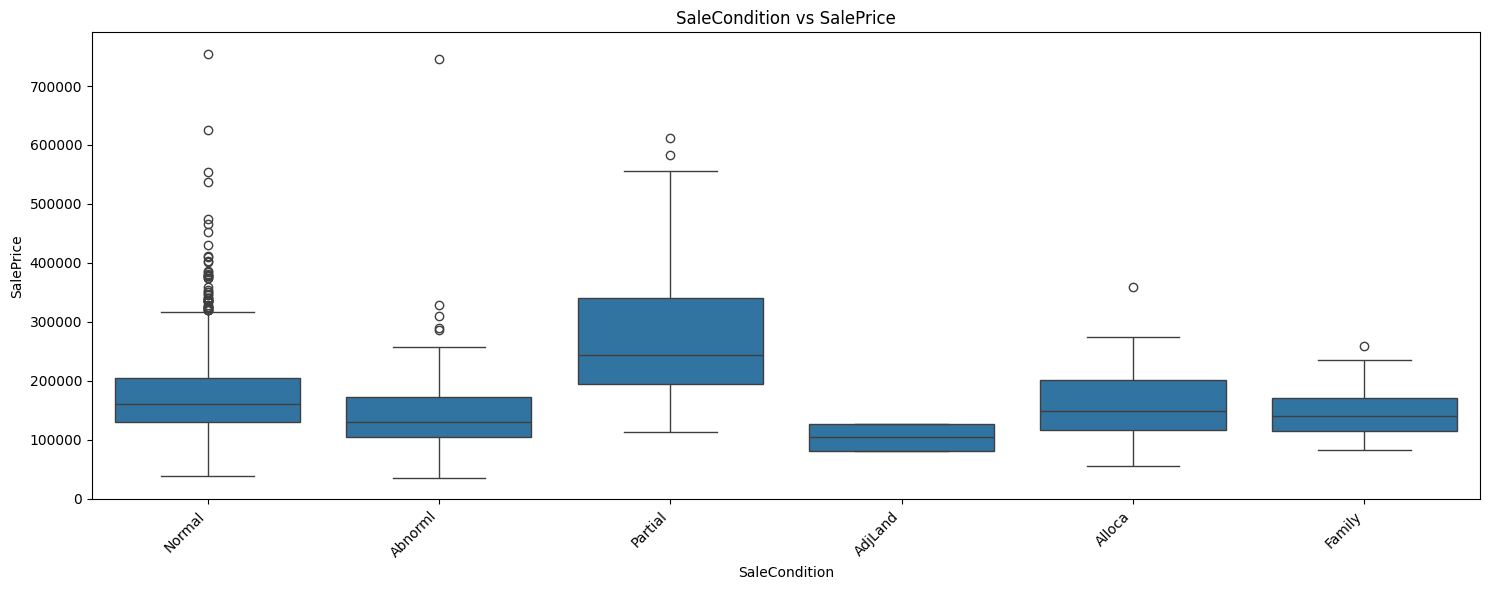


Value counts for SaleCondition:
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

Preparing features...

Splitting data into training and validation sets...

Training and evaluating models...


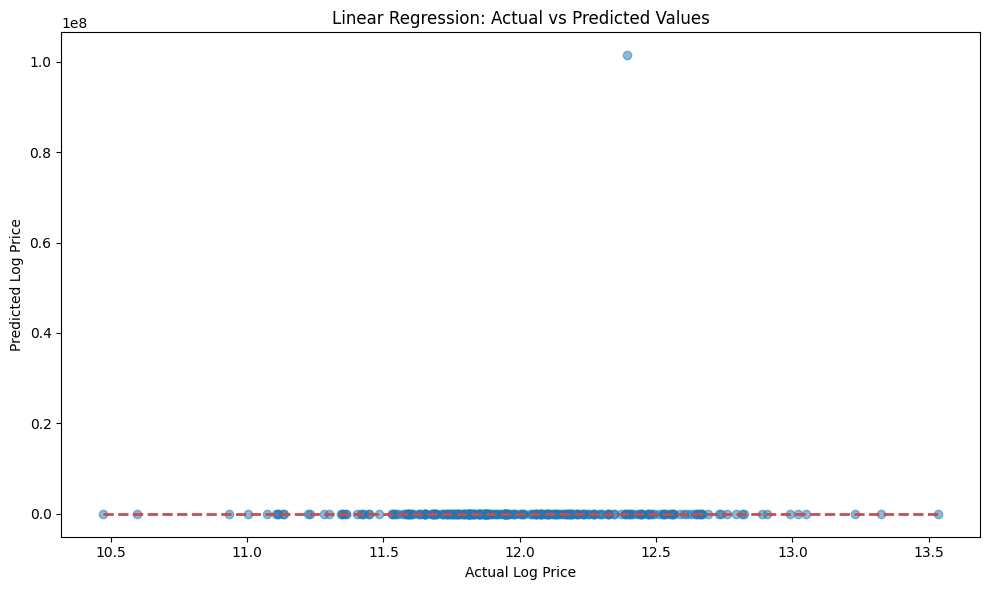

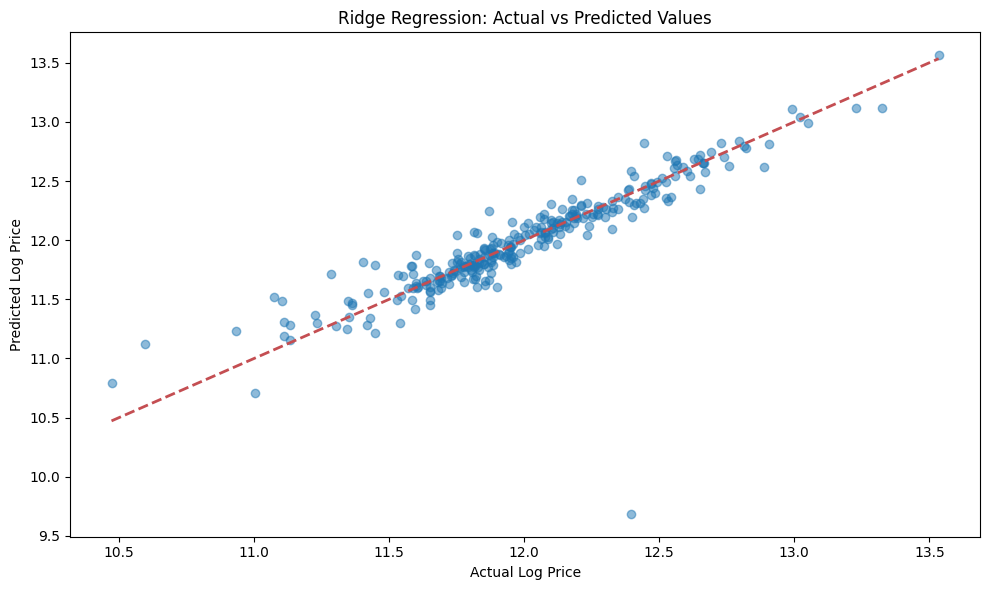

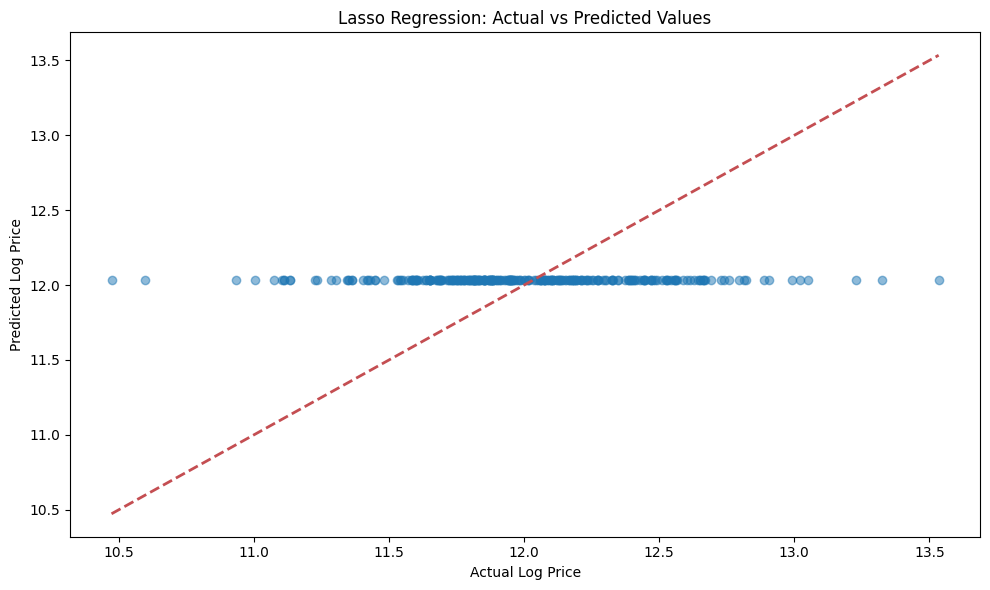


Model Performance:


,Train R2,Test R2,Train RMSE,Test RMSE
Linear Regression,0.944487,-1.888368e+14,0.091992,5.936247e+06
Ridge Regression,0.944320,7.831896e-01,0.092131,2.011447e-01
Lasso Regression,0.000000,-5.837289e-03,0.390439,4.332439e-01


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

# Set basic plot style for visualization
sns.set_theme()
plt.style.use('default')

def upload_and_load_data():
    """
    Upload and load data files using Colab's file upload widget
    """
    print("Please upload your train.csv file:")
    uploaded_train = files.upload()
    train_file = next(iter(uploaded_train))

    print("\nPlease upload your test.csv file:")
    uploaded_test = files.upload()
    test_file = next(iter(uploaded_test))

    # Reading the uploaded files
    train_df = pd.read_csv(io.BytesIO(uploaded_train[train_file]))
    test_df = pd.read_csv(io.BytesIO(uploaded_test[test_file]))

    print("\nTraining set shape:", train_df.shape)
    print("Test set shape:", test_df.shape)

    return train_df, test_df

def analyze_numerical_features(df, target='SalePrice'):
    """
    Analyze only numerical features and their correlations
    """
    # Selecting only numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_df = df[numerical_cols]

    # Calculating correlations
    correlations = numerical_df.corr()[target].sort_values(ascending=False)

    print("\nTop numerical correlations with", target)
    threshold = 0.5
    print(correlations[abs(correlations) > threshold])

    # Correlating heatmap of top features
    top_features = correlations[abs(correlations) > threshold].index

    plt.figure(figsize=(15, 10))
    sns.heatmap(numerical_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Top Numerical Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Scatter plots for top 5 correlated features selected
    top_5_features = correlations[1:6].index  # Exclude the target variable itself

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.ravel()

    for idx, feature in enumerate(top_5_features):
        sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
        axes[idx].set_title(f'{feature} vs {target}')

    plt.tight_layout()
    plt.show()

    return top_features

def analyze_categorical_features(df, target='SalePrice'):
    """
    Analyze categorical features using box plots
    """
    categorical_cols = df.select_dtypes(include=['object']).columns

    print("\nAnalyzing categorical features:")
    for col in categorical_cols:
        plt.figure(figsize=(15, 6))
        sns.boxplot(data=df, x=col, y=target)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{col} vs {target}')
        plt.tight_layout()
        plt.show()

        # Printing value counts for each category
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

def handle_missing_values(df):
    """
    Handle missing values in the dataset
    """
    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Filling numerical missing values with median
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())

    # Filling categorical missing values with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df

def prepare_features(df, categorical_cols):
    """
    Prepare features for modeling with proper handling of categorical variables
    """
    df_processed = df.copy()

    # Creating dummy variables for categorical features
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

    return df_processed

def analyze_target_variable(df, target='SalePrice'):
    """
    Analyze the target variable distribution
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Original distribution
    sns.histplot(data=df, x=target, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {target}')
    ax1.set_xlabel(target)

    # Log transform the target variable
    df[f'Log_{target}'] = np.log1p(df[target])

    # Log-transformed distribution
    sns.histplot(data=df, x=f'Log_{target}', kde=True, ax=ax2)
    ax2.set_title(f'Distribution of Log_{target}')
    ax2.set_xlabel(f'Log_{target}')

    plt.tight_layout()
    plt.show()

    return df

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Train and evaluate multiple regression models
    """
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0)
    }

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)

        # Calculate metrics
        results[name] = {
            'Train R2': r2_score(y_train, train_pred),
            'Test R2': r2_score(y_test, test_pred),
            'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
            'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred))
        }

        # Plotting actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, test_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Log Price')
        plt.ylabel('Predicted Log Price')
        plt.title(f'{name}: Actual vs Predicted Values')
        plt.tight_layout()
        plt.show()

    return results

def display_results(results):
    """
    Display model results in a formatted table
    """
    results_df = pd.DataFrame.from_dict(results, orient='index')
    display(results_df)

def main():
    try:
        # Upload and load data
        print("Starting house price prediction analysis...")
        train_df, test_df = upload_and_load_data()

        # Handle missing values first
        print("\nHandling missing values...")
        train_df = handle_missing_values(train_df)
        test_df = handle_missing_values(test_df)

        # Analyze target variable
        print("\nAnalyzing target variable distribution...")
        train_df = analyze_target_variable(train_df)

        # Analyzing numerical and categorical features separately
        print("\nAnalyzing numerical features...")
        important_numerical_features = analyze_numerical_features(train_df)

        print("\nAnalyzing categorical features...")
        analyze_categorical_features(train_df)

        # Identify categorical columns
        categorical_cols = train_df.select_dtypes(include=['object']).columns

        # Prepare features
        print("\nPreparing features...")
        train_processed = prepare_features(train_df, categorical_cols)
        test_processed = prepare_features(test_df, categorical_cols)

        # Selecting features and target
        X = train_processed.drop(['SalePrice', 'Log_SalePrice'], axis=1)
        y = train_processed['Log_SalePrice']  # Using log-transformed target

        # Splitting data
        print("\nSplitting data into training and validation sets...")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Training and evaluate models
        print("\nTraining and evaluating models...")
        results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

        # Display results
        print("\nModel Performance:")
        display_results(results)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

# Run the analysis
if __name__ == "__main__":
    main()

Feature selection: Exploratory data analysis identifies features which show significant correlation to the target; moreover, those features are used for prediction, while irrelevant or redundant features may be excluded.
Model development: different regression models linear, Ridge, Lasso are trained on the training set. The features must be scaled for achieving equal contribution.
Performance evaluation: performance is evaluated on the test set using 𝑅2
R2 and RMSE. Predictions are again validated by scatter plots, which provide extra evidence for model generalization.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
We chose BERT, which stands for Bidirectional Encoder Representations from Transformers, with the "nlptown/bert-base-multilingual-uncased-sentiment" model from the Hugging Face repository.

Description:

Original Pretraining Data Sources:

BERT has been pretrained on a large corpus of text, including:
BooksCorpus - 800M words
English Wikipedia - 2,500M words
This particular "nlptown/bert-base-multilingual-uncased-sentiment" has been further fine-tuned on many sentiment analysis datasets, which most presumably include multilingual datasets with labeled reviews for predicting the polarities of sentiments in a range of 1-5 stars.
Number of Parameters:
BERT-base has 110M parameters, distributed across 12 layers, with 768 hidden units per layer.
Task-Specific Fine-Tuning:
This PLM was fine-tuned specifically for multilingual sentiment classification tasks, where the output is a five-point sentiment scale going from 1 - very negative - to 5 - very positive.

In [2]:
# Install required libraries (if not already installed)
!pip install transformers
!pip install torch
!pip install scikit-learn

# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import files

# File upload interface for Google Colab
print("Please upload the dataset file (CSV format).")
uploaded = files.upload()

# Automatically detect the uploaded file name
dataset_filename = list(uploaded.keys())[0]

# Load the dataset
data = pd.read_csv(dataset_filename)

# Load pre-trained BERT tokenizer and model
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function for sentiment analysis using BERT
def bert_sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment = torch.argmax(logits, dim=1).item() + 1  # Convert to 1-5 scale
    return sentiment

# Map sentiment labels to numerical values for evaluation
label_mapping = {"very negative": 1, "negative": 2, "neutral": 3, "positive": 4, "very positive": 5}
data['actual_label'] = data['sentiment'].str.lower().map(label_mapping)

# Apply BERT sentiment analysis (zero-shot)
data['predicted_sentiment'] = data['clean_text'].apply(bert_sentiment_analysis)

# Drop rows with NaN in actual labels
data_cleaned = data.dropna(subset=['actual_label']).reset_index(drop=True)

# Evaluation metrics
y_true = data_cleaned['actual_label']
y_pred = data_cleaned['predicted_sentiment']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

# Print results
print("\n### Evaluation Results ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Save results to a CSV file
output_filename = "bert_sentiment_analysis_results.csv"
data_cleaned.to_csv(output_filename, index=False)
print(f"Results saved to {output_filename}. You can download it using the link below.")

# Provide download link for the results file
from google.colab import files
files.download(output_filename)


Please upload the dataset file (CSV format).


Saving annotated_reviews_sentiment.csv to annotated_reviews_sentiment.csv

### Evaluation Results ###
Accuracy: 0.20
Precision: 0.42
Recall: 0.20
F1 Score: 0.27
Results saved to bert_sentiment_analysis_results.csv. You can download it using the link below.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://myunt-my.sharepoint.com/my?id=%2Fpersonal%2Fsahithitummala%5Fmy%5Funt%5Fedu%2FDocuments%2FInfo%205731%20assignment%204

Advantages: BERT's pretraining on relatively diverse datasets renders it to generalize well between tasks, even without the need for task-specific fine-tuning. Contextual Understanding: BERT is able to understand words in the context of the full sentence, thereby providing essential semantic understanding-a major distinguishing factor for tasks such as sentiment analysis. Multilingual: The model used is multilingual and thus accommodates datasets having varied linguistic inputs. Disadvantages: Very expensive computationally-Running BERT on large datasets requires considerable computational facilities, especially with longer texts. Capability when pushed to extremes: Very theoretical edge cases such as sarcasm or vague language pose problems for the zero-shot models without receiving some form of task-specific fine-tuning. The output limits the internal representation of the words within the model to a limited designation from 1-5 for the purpose of sentiment analysis. Thus, the model cannot easily be transformed for classification by any custom entries in the dataset.

Challenges faced during this process would include proper preprocessing of the dataset, cleaning input text, and providing the correct mapping of annotated labels (sentiment) to the model's predictions to avoid evaluation errors. The dropping of rows with their annotations being rendered as NaN necessitated careful handling, ensuring that the evaluation was based upon a proper subset. The running of large BERT on data took quite sufficient time, which constituted an obvious need for resorting to hardware acceleration (like the GPU).